<img src="./logo.png">

# Dataload & Pre-setting

## Import Package

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Warnings
import warnings
warnings.filterwarnings(action='ignore')

# Processing Date
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# Data visualization
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. Korean font -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # unicode (-)
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4

import seaborn as sns
sns.set() # seaborn : gray grid
sns.set(rc={'figure.figsize':(18, 5)}) # figure size

In [2]:
# sklearn : model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

In [3]:
# sklearn : regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.svm import SVC

from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# sklearn : regression scoring
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

In [4]:
# sklearn : scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Dataload

In [5]:
df=pd.read_csv("./dataset/train.csv")

In [6]:
test=pd.read_csv("./dataset/test.csv")

<pre>
OverallQual : 전반적 재료와 마감 품질  -> all_auql
GrLivArea : 지상층 생활 면적           -> gr_sf
ExterQual : 외관 재료 품질             -> ex_qual
GarageCars: 차고 자리 개수             -> gara_cars
GarageArea: 차고 면적                  -> gara_sf
KitchenQual : 부억 품질                -> kit_qual
TotalBsmtSF : 지하실 면적              -> bsmt_sf
1stFlrSF : 1층 면적                    -> 1st_sf
BsmtQual : 지하실 높이                 -> bsmt_qual
FullBath : 지상층 화장실 개수          -> full_bath
YearBuilt : 완공 연도                  -> year_built
YearRemodAdd : 리모델링 연도           -> year_remod
GarageYrBlt : 차고 완공 연도           -> year_gara_blt
target : 집값(달러 단위)               -> target

## Change columns name

In [7]:
df.columns=[col.lower() for col in df.columns]

In [8]:
col_list=['id','all_qual','gr_sf','ex_qual', 'gara_cars','gara_sf','kit_qual','bsmt_sf','1st_sf','bsmt_qual','full_bath','year_built','year_remod','year_gara_blt','target']
df.columns=col_list

In [9]:
df.head()

,id,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [10]:
df.shape

(1350, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1350 non-null   int64 
 1   all_qual       1350 non-null   int64 
 2   gr_sf          1350 non-null   int64 
 3   ex_qual        1350 non-null   object
 4   gara_cars      1350 non-null   int64 
 5   gara_sf        1350 non-null   int64 
 6   kit_qual       1350 non-null   object
 7   bsmt_sf        1350 non-null   int64 
 8   1st_sf         1350 non-null   int64 
 9   bsmt_qual      1350 non-null   object
 10  full_bath      1350 non-null   int64 
 11  year_built     1350 non-null   int64 
 12  year_remod     1350 non-null   int64 
 13  year_gara_blt  1350 non-null   int64 
 14  target         1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [12]:
df.head(1)

,id,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250


#### ToDo: there is no null data / object: Exter Qual, Kitchen Qual, Bsmt Qual

## function

### scoring

In [13]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

### split & fit & scoring

In [14]:
# def reg_fit_score(data):
#     y=data['target']
#     X=data.drop('target', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
#     model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
#     score_list=[]
    
#     f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
#     for i, model in enumerate(model_list):
#         model.fit(X_train, y_train)
#         # print(X.columns)
#         # print(model.coef_)
        
#         axs[i].set_title(model.__class__.__name__)
#         sns.barplot(x=model.coef_, y=X.columns, ax=axs[i])
        
#         pred=model.predict(X_test)
#         score=NMAE(y_test, pred)
#         score_list.append(score)
        
#         # print(f"{model.__class__.__name__}:\n\t{fst_score[model.__class__.__name__]} ---> {score:.6f}")
#     return score_list

In [15]:
# def tree_fit_score(data):
#     y=data['target']
#     X=data.drop('target', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
#     model_list = [XGBRegressor(),LGBMRegressor()]    
#     score_list=[]
    
#     f, axs = plt.subplots(1,2, figsize=(16,4))
    
#     for i, model in enumerate(model_list):
#         model.fit(X_train, y_train)
#         #print(model.feature_importances_)
        
#         axs[i].set_title(model.__class__.__name__)
#         sns.barplot(y=X.columns, x=model.feature_importances_, ax=axs[i])
            
#         pred=model.predict(X_test)
#         score=NMAE(y_test, pred)
#         score_list.append(score)
        
#         # print(f"{model.__class__.__name__}:\n\t{fst_score[model.__class__.__name__]} ---> {score:.6f}")
#     return score_list

In [16]:
def reg_fit_score(data):
    y=data['target']
    X=data.drop('target', axis=1)
    model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
    score_list=[]
    
    f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_coef_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=NMAE(y_test, pred)
            fold_score_list.append(score)
            
            fold_coef_array[j,]=model.coef_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_coef_=fold_coef_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_coef_, y=X.columns, ax=axs[i])
    
    return score_list

In [17]:
def tree_fit_score(data):
    y=data['target']
    X=data.drop('target', axis=1)
    model_list = [XGBRegressor(),LGBMRegressor()]    
    score_list=[]
    
    f, axs = plt.subplots(1,2, figsize=(16,4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_importance_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=NMAE(y_test, pred)
            fold_score_list.append(score)
            
            fold_importance_array[j,]=model.feature_importances_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_impo_=fold_importance_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_impo_, y=X.columns, ax=axs[i])
    
    return score_list

In [18]:
# empty score dataframe
index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
sco_df=pd.DataFrame(index=index_list)

# fit & score & make score dataframe
def fit_score(data, trial_name, DF=True):
    
    reg_score_list=reg_fit_score(data)
    tree_score_list=tree_fit_score(data)
    score_list=reg_score_list+tree_score_list
    
    index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
    score_series=pd.Series(score_list, index=index_list, name=trial_name)
    
    if DF==True:
        global sco_df
        sco_df=pd.concat([sco_df, score_series], axis=1)
        sco_df
    else:
        print(score_series)
    

# EDA

## unique

In [19]:
df.nunique()

id               1350
all_qual            9
gr_sf             813
ex_qual             4
gara_cars           5
gara_sf           454
kit_qual            4
bsmt_sf           709
1st_sf            736
bsmt_qual           5
full_bath           5
year_built        105
year_remod         61
year_gara_blt      97
target            619
dtype: int64

In [20]:
# unique columns drop
df=df.drop('id', axis=1)

In [21]:
df.nunique()[df.nunique()<=105]

all_qual           9
ex_qual            4
gara_cars          5
kit_qual           4
bsmt_qual          5
full_bath          5
year_built       105
year_remod        61
year_gara_blt     97
dtype: int64

In [22]:
for col in df.nunique()[df.nunique()<=105].index:
    print(f"<{col}>\n\t{np.sort(df[col].unique())}")

<all_qual>
	[ 2  3  4  5  6  7  8  9 10]
<ex_qual>
	['Ex' 'Fa' 'Gd' 'TA']
<gara_cars>
	[1 2 3 4 5]
<kit_qual>
	['Ex' 'Fa' 'Gd' 'TA']
<bsmt_qual>
	['Ex' 'Fa' 'Gd' 'Po' 'TA']
<full_bath>
	[0 1 2 3 4]
<year_built>
	[1880 1882 1885 1890 1892 1893 1900 1908 1910 1912 1913 1914 1915 1916
 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010]
<year_remod>
	[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1

<img src='https://cdn-images-1.medium.com/max/430/1*1mnPIiqtP6NVpf5xxYSe7Q.png'>

#### ToDo: quality columns -> ordinal

In [23]:
df.loc[:,df.nunique()>=105].head()

,gr_sf,gara_sf,bsmt_sf,1st_sf,year_built,target
0,2392,968,2392,2392,2003,386250
1,1352,466,1352,1352,2006,194000
2,900,288,864,900,1967,123000
3,1174,576,680,680,1900,135000
4,1958,936,1026,1026,2005,250000


## describe & destribution

In [24]:
df.describe()

,all_qual,gr_sf,gara_cars,gara_sf,bsmt_sf,1st_sf,full_bath,year_built,year_remod,year_gara_blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [25]:
col_list=df.select_dtypes(include='object').columns.tolist()
df[col_list].describe()

,ex_qual,kit_qual,bsmt_qual
count,1350,1350,1350
unique,4,4,5
top,TA,TA,TA
freq,808,660,605


In [26]:
df[df['year_gara_blt']>2200]

,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


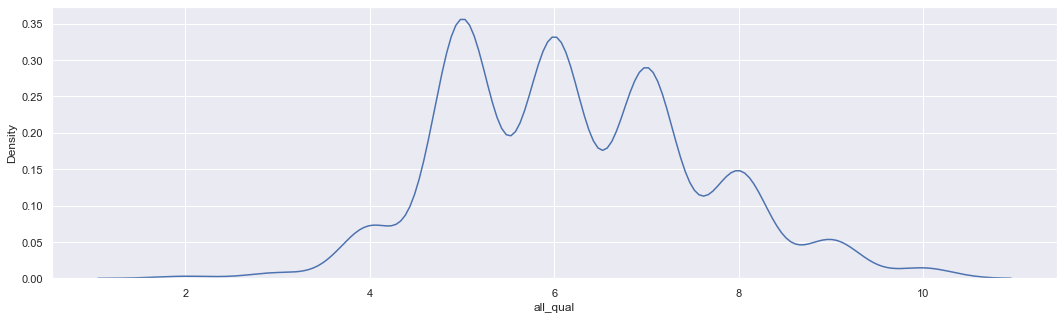

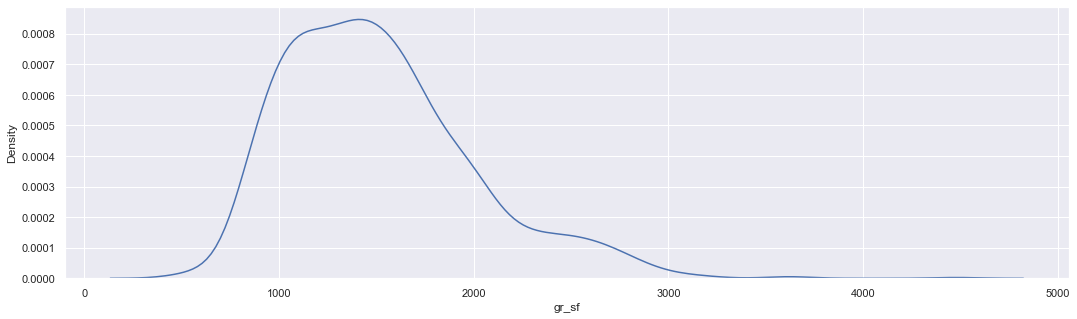

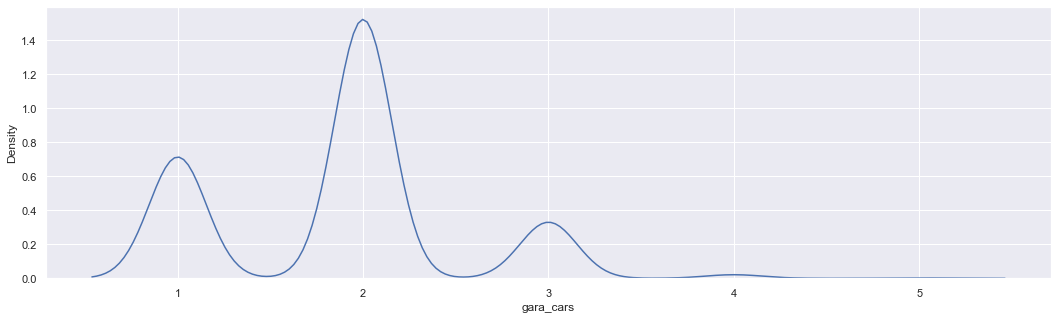

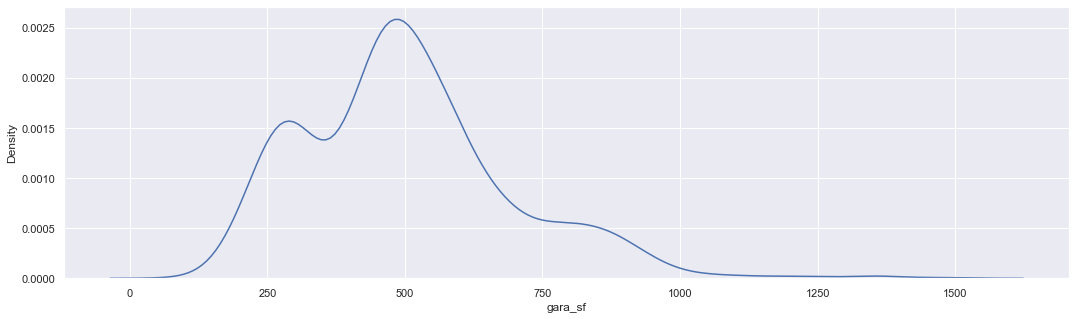

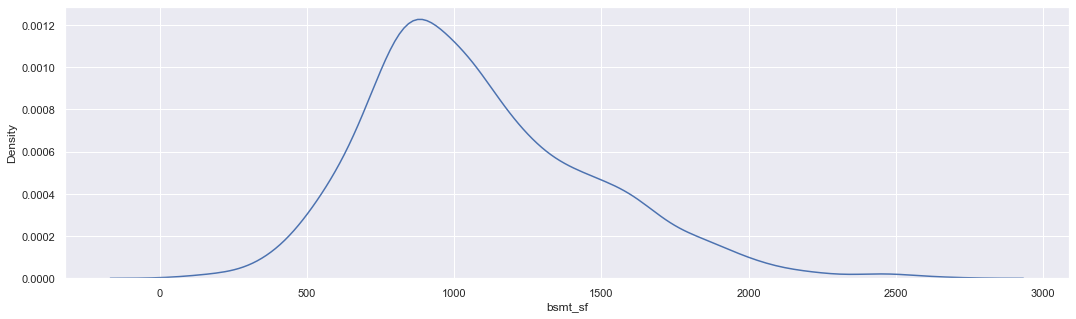

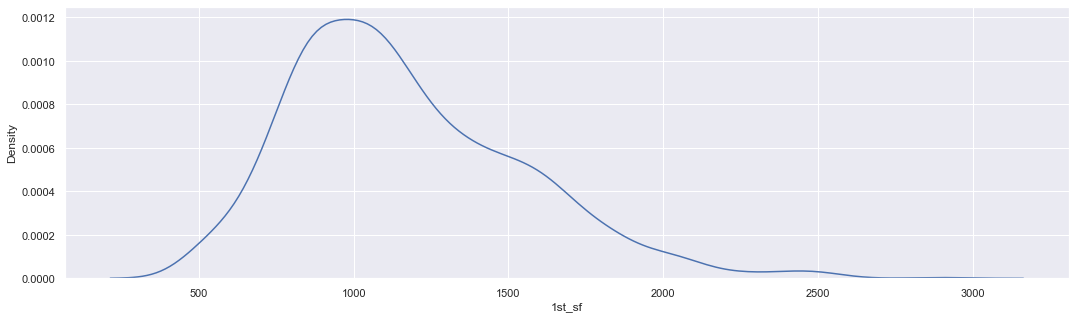

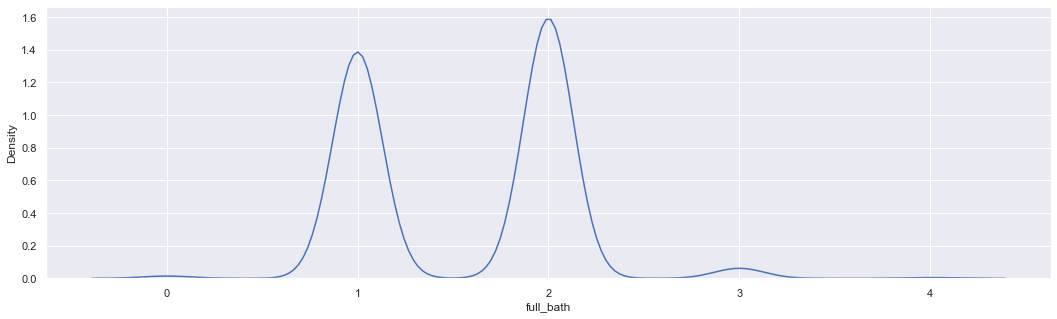

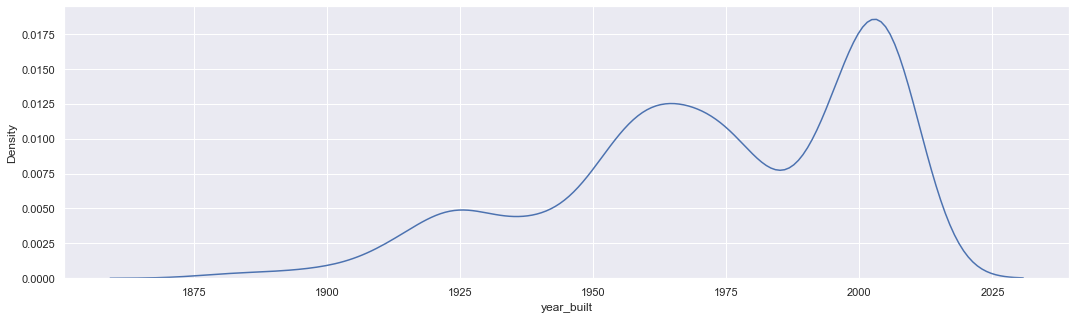

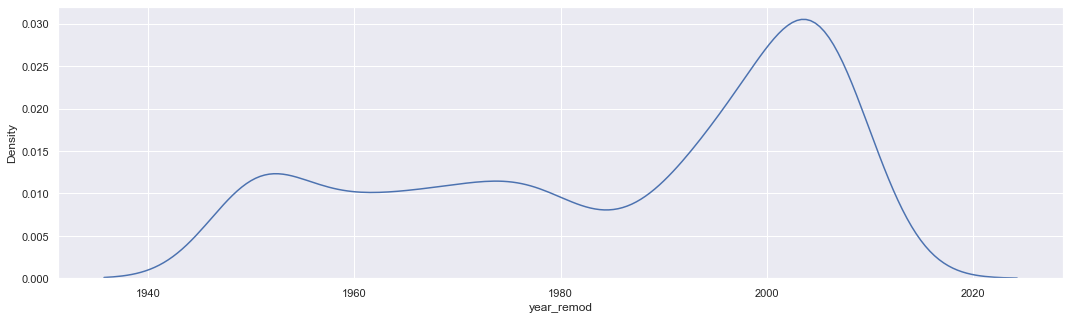

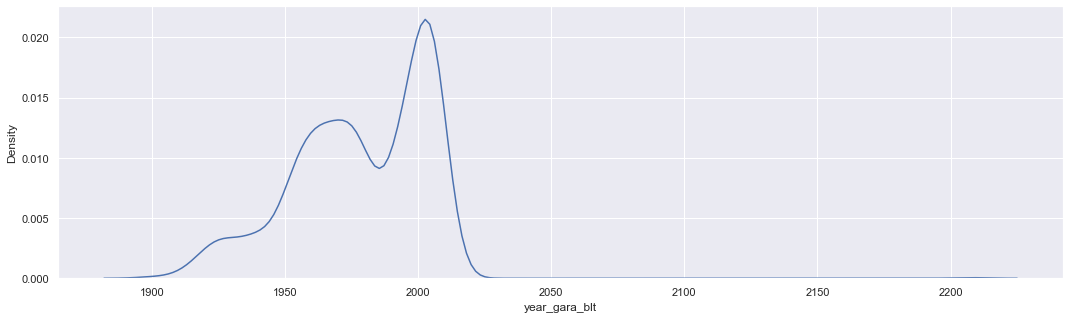

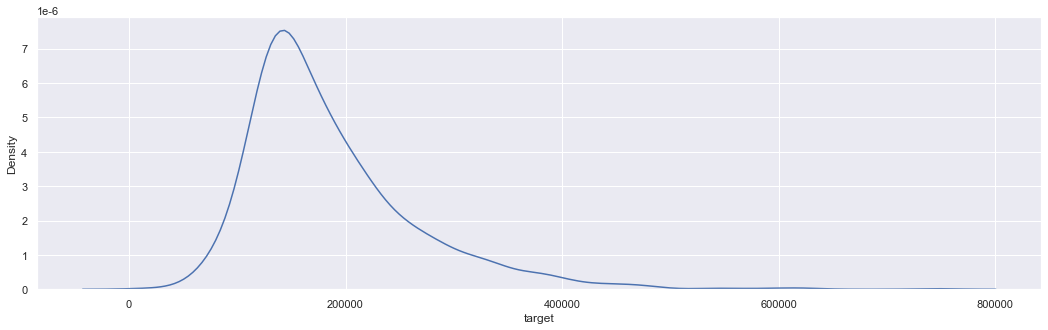

In [27]:
for col in df.select_dtypes(exclude='object').columns.tolist():
    sns.kdeplot(data=df, x=col)
    plt.show()

## correlation(without objective columns)

<AxesSubplot:>

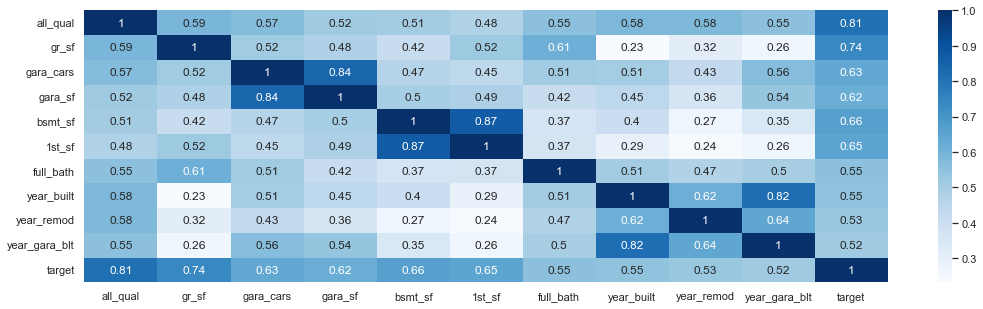

In [28]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
# there is no negative correlation

#### ToDo:   
**gara_sf vs gara_cars(0.84), gr_sf vs full bath(0.61), bsmt_sf vs 1st_sf(0.87), year_built vs year_gara_blt(0.82), year_built vs year_gara_blt(0.62), year remodvsyear_gara_blt(0.64)**

[without target]  
year_blt values  
_sf values  
gara_sf & gara_sf values

[with target]  
-> all_qual, ar_sf have the largest correlation

*******how to precess*******  
[_sf values]  
plan 1) just add up _sf values -> make total_sf feature  
plan 2) drop other values  
plan 3) give different weight (gr_sf, 1st_sf>bsmt_sf)  

[year_blt]  
??

## correlation(cross tab of objective features)

In [29]:
pd.crosstab(df['ex_qual'], df['kit_qual'])

kit_qual,Ex,Fa,Gd,TA
ex_qual,,,,
Ex,43,0,5,1
Fa,1,1,0,6
Gd,53,0,397,35
TA,10,22,158,618


In [30]:
pd.crosstab(df['bsmt_qual'], df['kit_qual'])

kit_qual,Ex,Fa,Gd,TA
bsmt_qual,,,,
Ex,71,0,53,10
Fa,2,2,2,22
Gd,24,2,384,172
Po,0,0,0,1
TA,10,19,121,455


In [31]:
pd.crosstab(df['ex_qual'], df['bsmt_qual'])

bsmt_qual,Ex,Fa,Gd,Po,TA
ex_qual,,,,,
Ex,43,0,5,0,1
Fa,0,1,1,0,6
Gd,82,2,358,0,43
TA,9,25,218,1,555


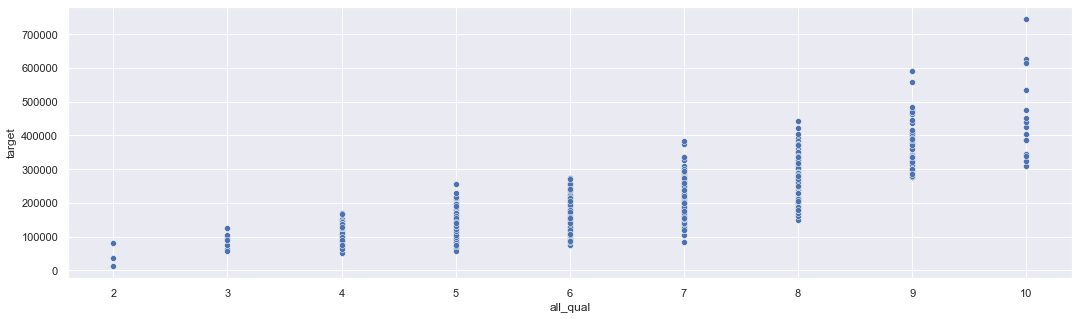

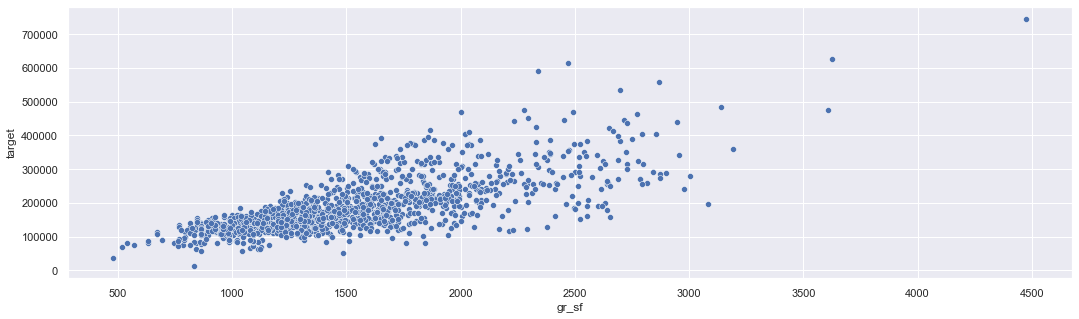

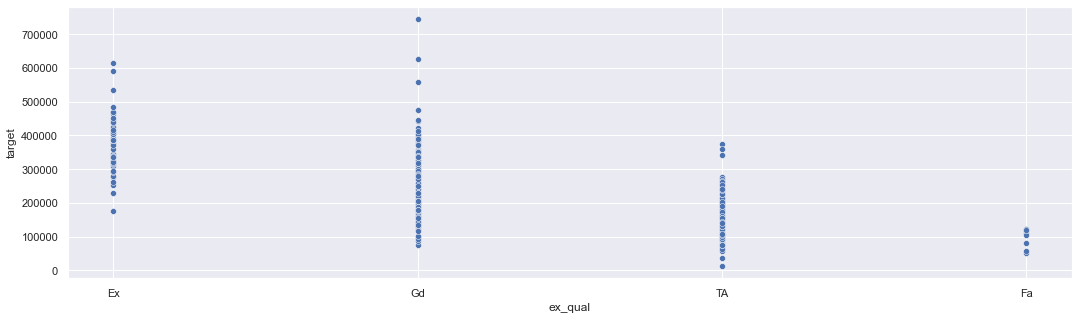

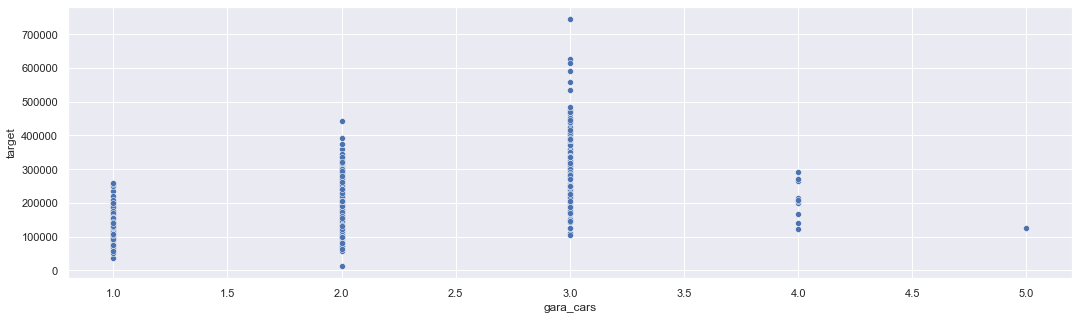

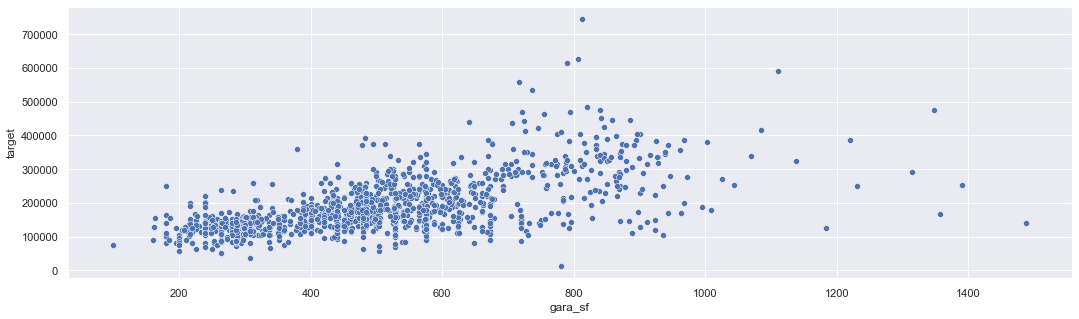

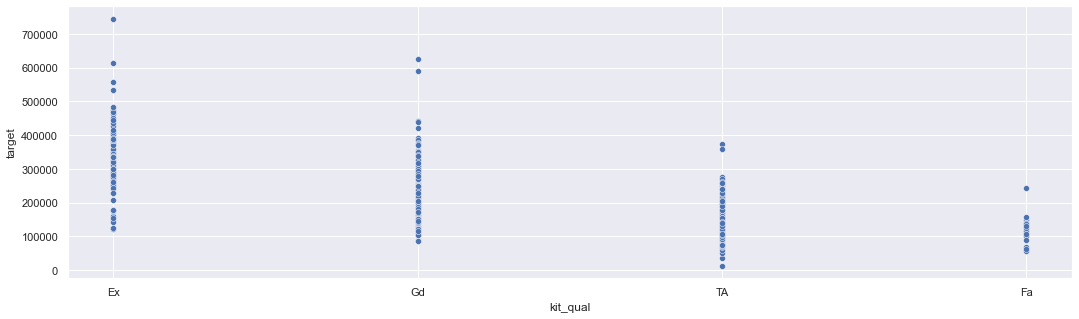

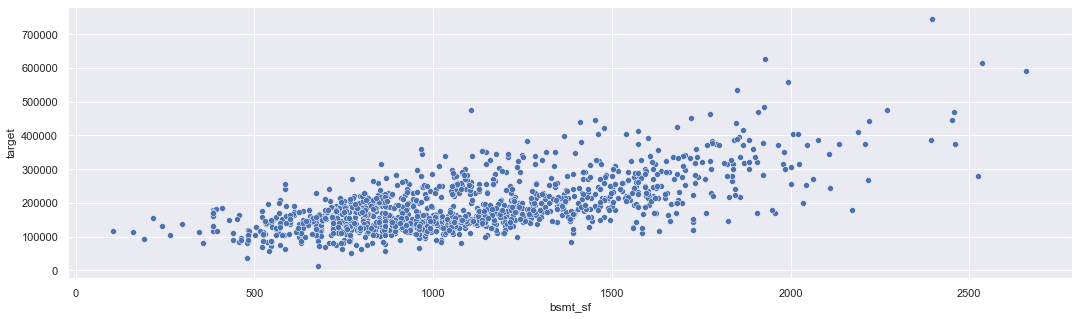

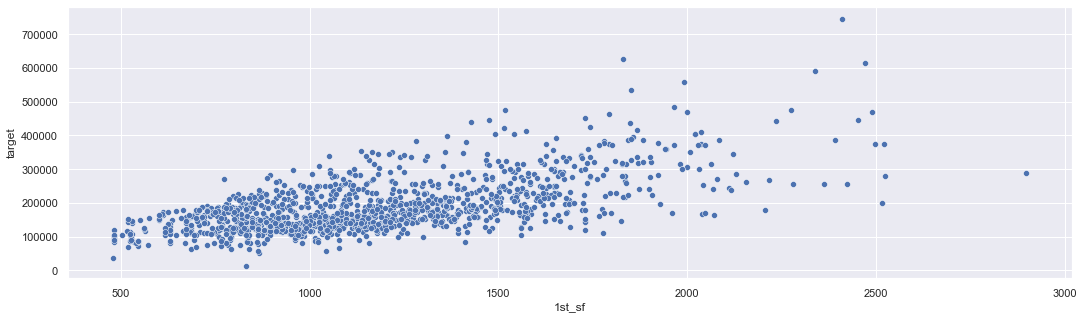

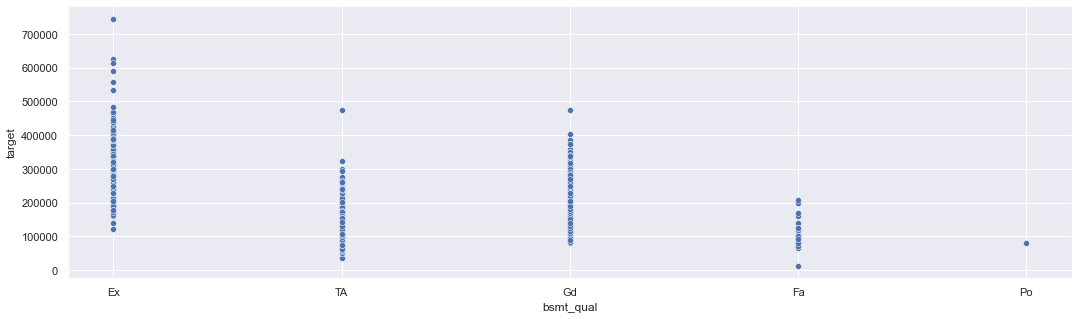

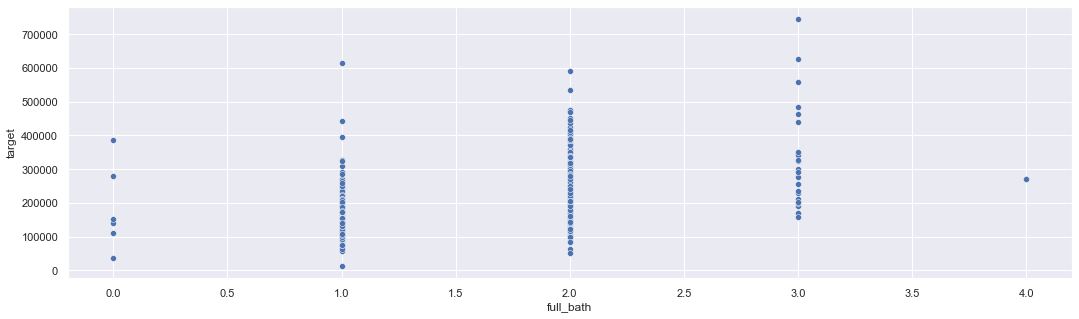

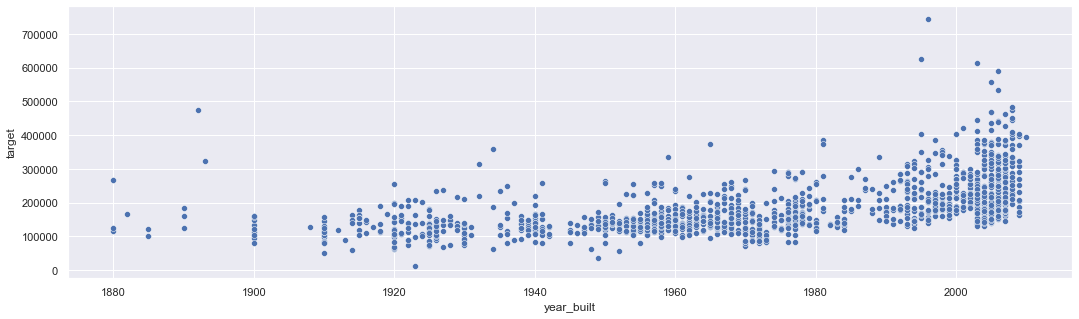

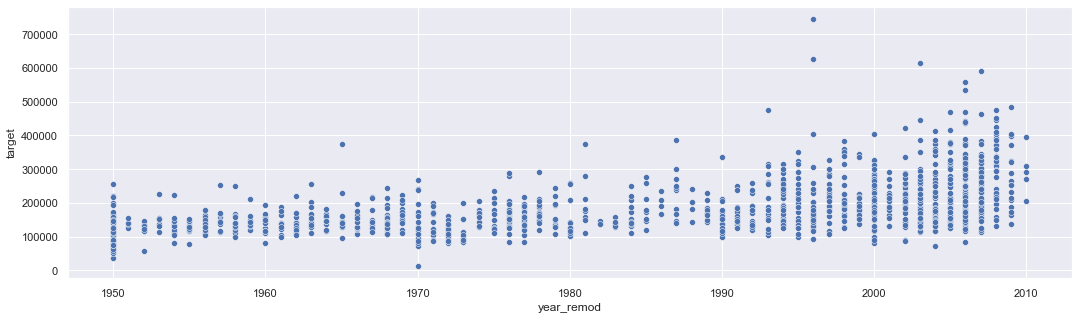

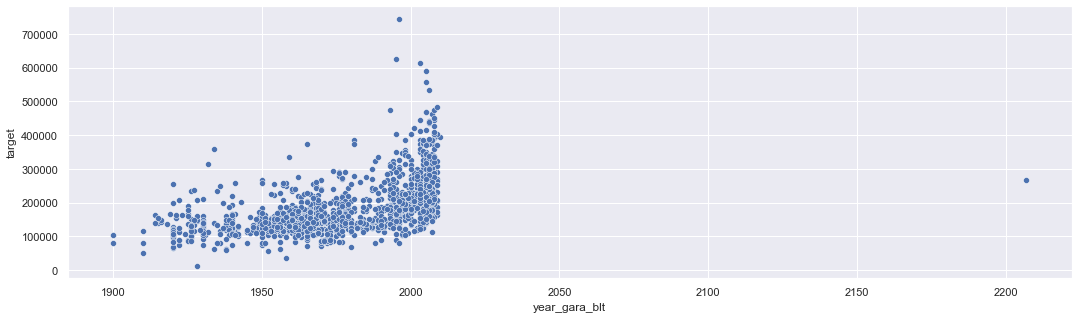

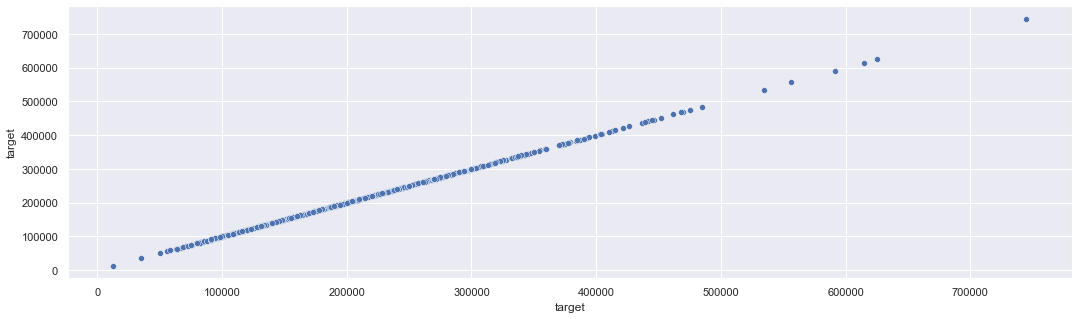

In [32]:
for col in df:
    sns.scatterplot(data=df, x=col, y="target")
    plt.show()

#### Todo: outlier : year_gara_blt -> 2007

# Processing

## object -> ordinal

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   all_qual       1350 non-null   int64 
 1   gr_sf          1350 non-null   int64 
 2   ex_qual        1350 non-null   object
 3   gara_cars      1350 non-null   int64 
 4   gara_sf        1350 non-null   int64 
 5   kit_qual       1350 non-null   object
 6   bsmt_sf        1350 non-null   int64 
 7   1st_sf         1350 non-null   int64 
 8   bsmt_qual      1350 non-null   object
 9   full_bath      1350 non-null   int64 
 10  year_built     1350 non-null   int64 
 11  year_remod     1350 non-null   int64 
 12  year_gara_blt  1350 non-null   int64 
 13  target         1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [34]:
df['ex_qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [35]:
df['bsmt_qual'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [36]:
df['kit_qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [37]:
col_list=df.select_dtypes(include='object').columns.tolist()
for col in col_list:
    df[col]=df[col].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[4,3,2,1,0])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   all_qual       1350 non-null   int64
 1   gr_sf          1350 non-null   int64
 2   ex_qual        1350 non-null   int64
 3   gara_cars      1350 non-null   int64
 4   gara_sf        1350 non-null   int64
 5   kit_qual       1350 non-null   int64
 6   bsmt_sf        1350 non-null   int64
 7   1st_sf         1350 non-null   int64
 8   bsmt_qual      1350 non-null   int64
 9   full_bath      1350 non-null   int64
 10  year_built     1350 non-null   int64
 11  year_remod     1350 non-null   int64
 12  year_gara_blt  1350 non-null   int64
 13  target         1350 non-null   int64
dtypes: int64(14)
memory usage: 147.8 KB


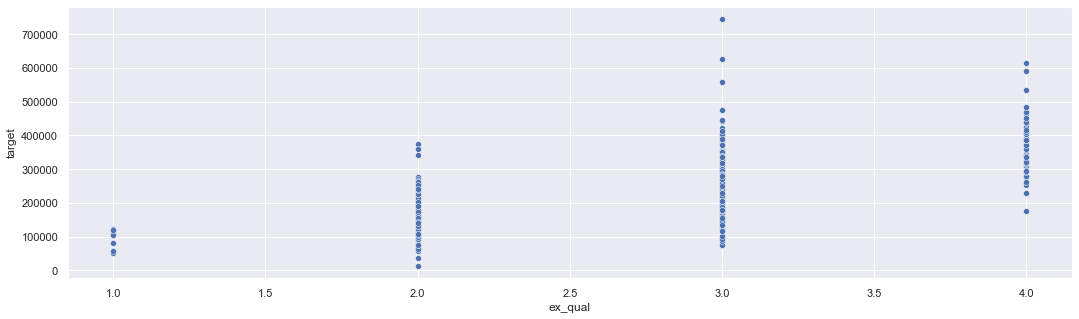

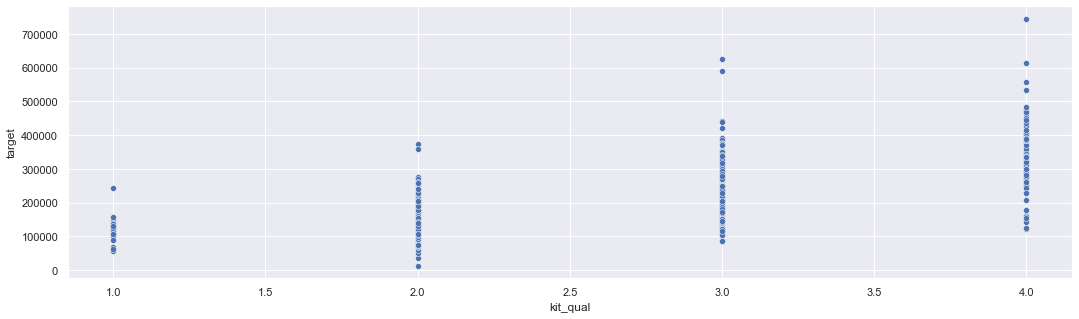

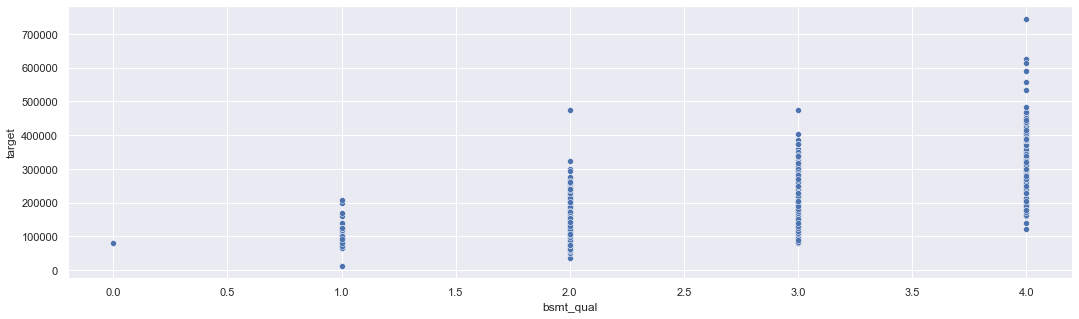

In [39]:
for col in col_list:
    sns.scatterplot(data=df, x=col, y="target")
    plt.show()

<AxesSubplot:>

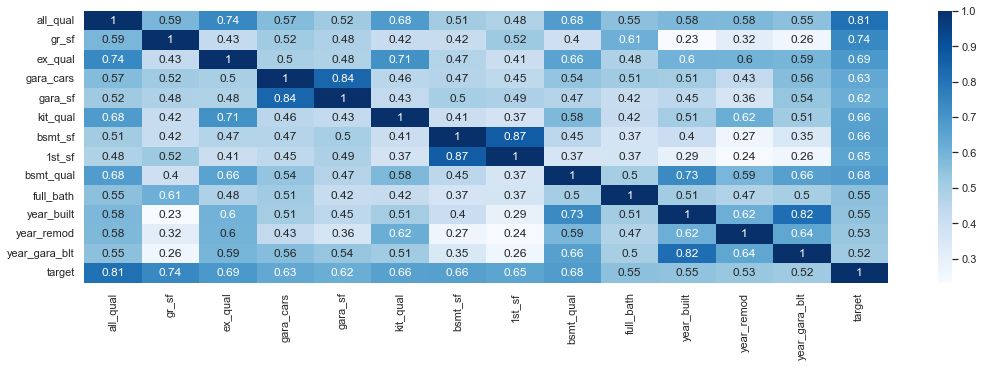

In [40]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

## feature processing

### outlier

In [41]:
df[df['year_gara_blt']==2207]

,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
254,8,1564,3,2,502,4,1546,1564,3,2,2006,2007,2207,267300


In [42]:
df['year_gara_blt']=df['year_gara_blt'].replace(2207, 2007)
df.loc[254, :]

all_qual              8
gr_sf              1564
ex_qual               3
gara_cars             2
gara_sf             502
kit_qual              4
bsmt_sf            1546
1st_sf             1564
bsmt_qual             3
full_bath             2
year_built         2006
year_remod         2007
year_gara_blt      2007
target           267300
Name: 254, dtype: int64

<AxesSubplot:xlabel='year_gara_blt', ylabel='target'>

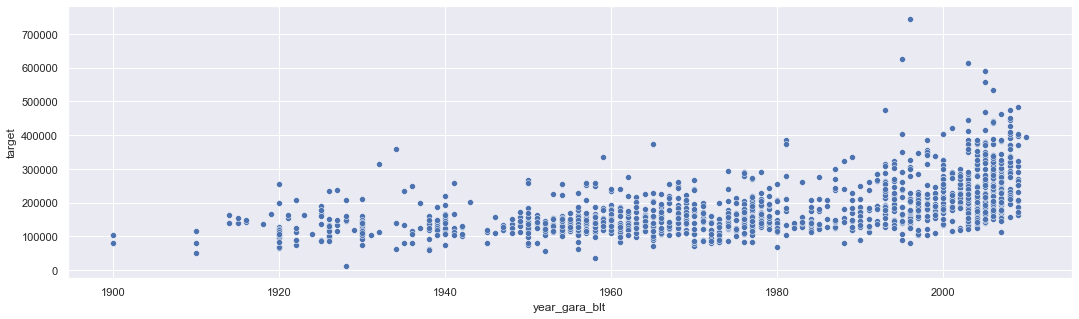

In [43]:
sns.scatterplot(data=df, x='year_gara_blt', y='target')

# fitting & evaluation

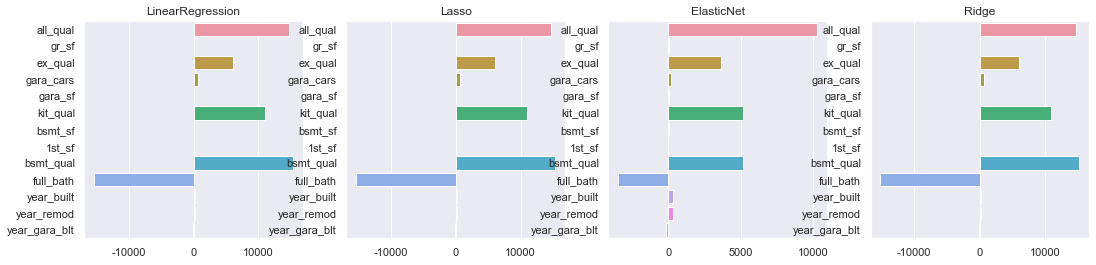

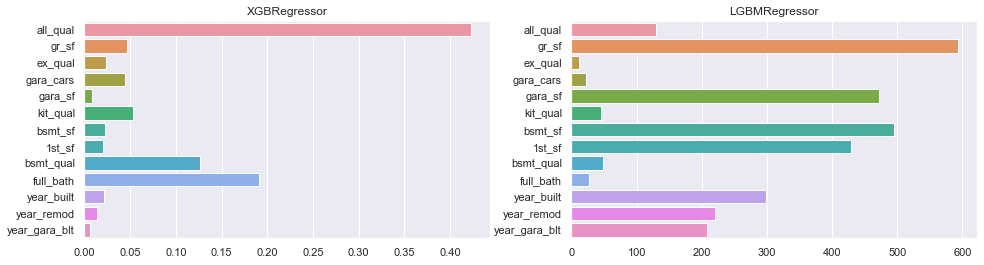

In [44]:
fit_score(df, 'pre_processing')

In [45]:
sco_df

,pre_processing
LinearRegression(),0.114679
Lasso(),0.114677
ElasticNet(),0.115463
Ridge(),0.114654
XGBRegressor(),0.105701
LGBMRegressor(),0.099447


# feature engineering

#### ToDo:   
**gara_sf vs gara_cars(0.84), gr_sf vs full bath(0.61), bsmt_sf vs 1st_sf(0.87), year_built vs year_gara_blt(0.82), year_built vs year_gara_blt(0.62), year remodvsyear_gara_blt(0.64)**

[without target]  
year_blt values  
_sf values  
gara_sf & gara_sf values

[with target]  
-> all_qual, ar_sf have the largest correlation

*******how to precess*******  
[_sf values]  
plan 1) just add up _sf values -> make total_sf feature  
plan 2) drop other values  
plan 3) give different weight (gr_sf, 1st_sf>bsmt_sf)  

[year_blt]  
??

## _sf features

### plan 1) drop some columns

* drop 1st_sf, bsmt_sf

In [46]:
df_t=df.copy()

In [47]:
df_t[['gr_sf', 'bsmt_sf', '1st_sf', 'gara_sf']].corr()

,gr_sf,bsmt_sf,1st_sf,gara_sf
gr_sf,1.000000,0.419220,0.522535,0.480863
bsmt_sf,0.419220,1.000000,0.868811,0.499634
1st_sf,0.522535,0.868811,1.000000,0.485843
gara_sf,0.480863,0.499634,0.485843,1.000000


In [48]:
df_t[['gr_sf', 'bsmt_sf', '1st_sf', 'gara_sf']].head()
# 'gr_sf' ~ 'bsmt_sf' ~ '1st_sf' but gr_sf has low correlation with the others -> gr_sf should be have outlier

,gr_sf,bsmt_sf,1st_sf,gara_sf
0,2392,2392,2392,968
1,1352,1352,1352,466
2,900,864,900,288
3,1174,680,680,576
4,1958,1026,1026,936


In [49]:
df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

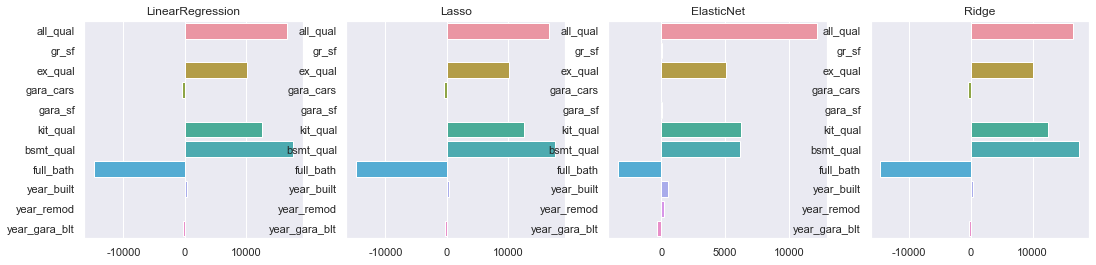

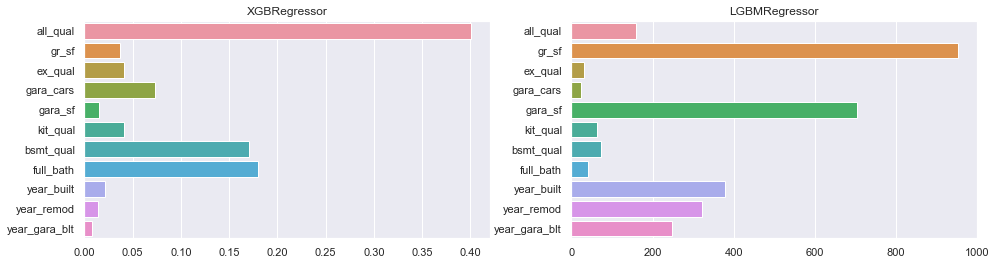

In [50]:
fit_score(df_t, 'drop_bsmt&1st_sf')

In [51]:
sco_df

,pre_processing,drop_bsmt&1st_sf
LinearRegression(),0.114679,0.128371
Lasso(),0.114677,0.128369
ElasticNet(),0.115463,0.130594
Ridge(),0.114654,0.128334
XGBRegressor(),0.105701,0.114146
LGBMRegressor(),0.099447,0.112721


* drop 1st_sf, bsmt_sf -> log _sf

In [52]:
df_t['gr_sf']=np.log1p(df_t['gr_sf'])
df_t['gara_sf']=np.log1p(df_t['gara_sf'])

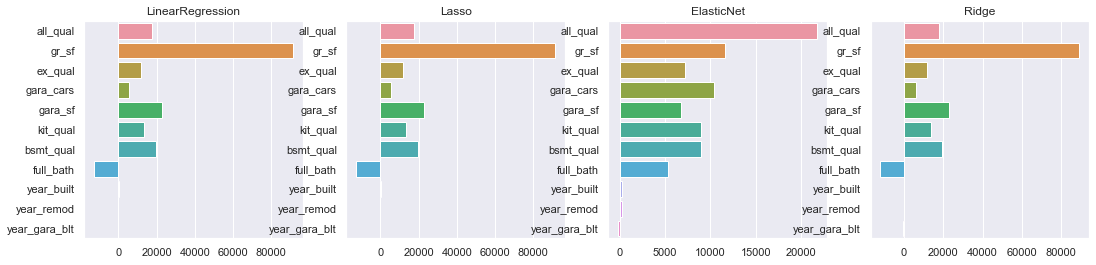

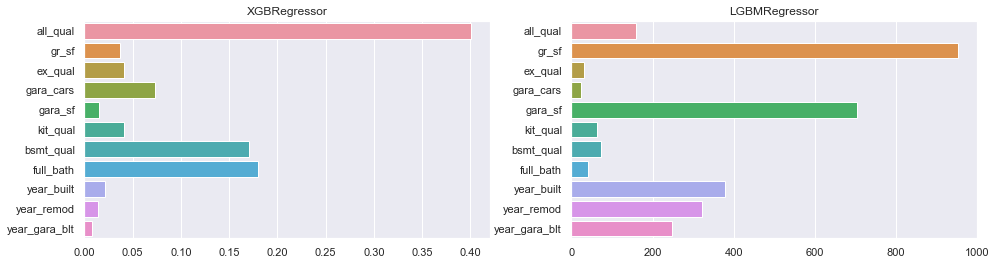

In [53]:
fit_score(df_t, 'drop_bsmt&1st_sf & log_sf')

In [54]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf
LinearRegression(),0.114679,0.128371,0.136562
Lasso(),0.114677,0.128369,0.136559
ElasticNet(),0.115463,0.130594,0.149715
Ridge(),0.114654,0.128334,0.136416
XGBRegressor(),0.105701,0.114146,0.114143
LGBMRegressor(),0.099447,0.112721,0.112707


* drop 1st

In [55]:
df_t=df.copy()

In [56]:
df_t=df_t.drop(['1st_sf'], axis=1)

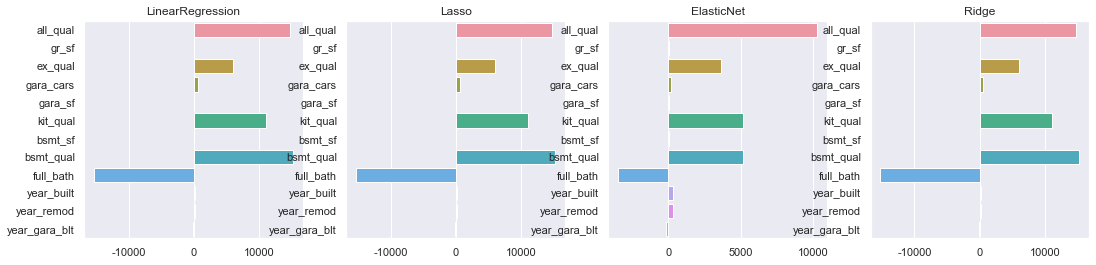

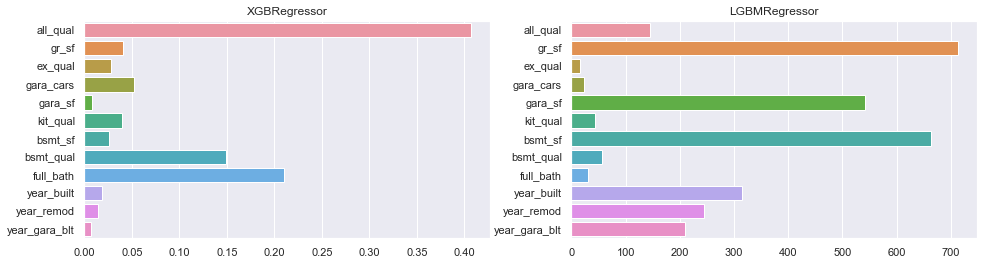

In [57]:
fit_score(df_t, 'drop_1st_sf')

In [58]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905
Lasso(),0.114677,0.128369,0.136559,0.114903
ElasticNet(),0.115463,0.130594,0.149715,0.115539
Ridge(),0.114654,0.128334,0.136416,0.114879
XGBRegressor(),0.105701,0.114146,0.114143,0.105439
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458


* drop 1st_sf -> log _sf

In [59]:
df_t['gr_sf']=np.log1p(df_t['gr_sf'])
df_t['bsmt_sf']=np.log1p(df_t['bsmt_sf'])
df_t['gara_sf']=np.log1p(df_t['gara_sf'])

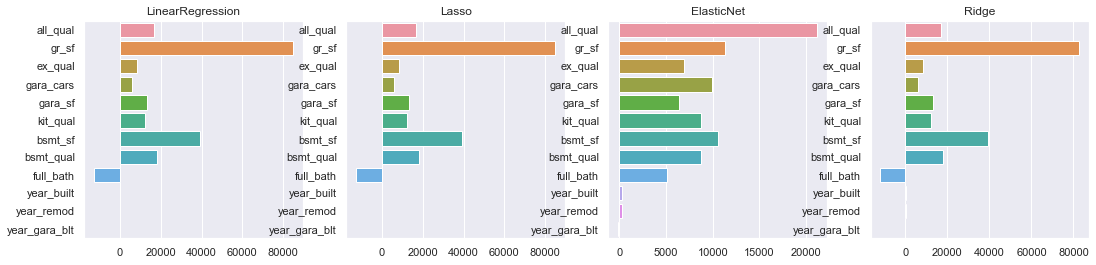

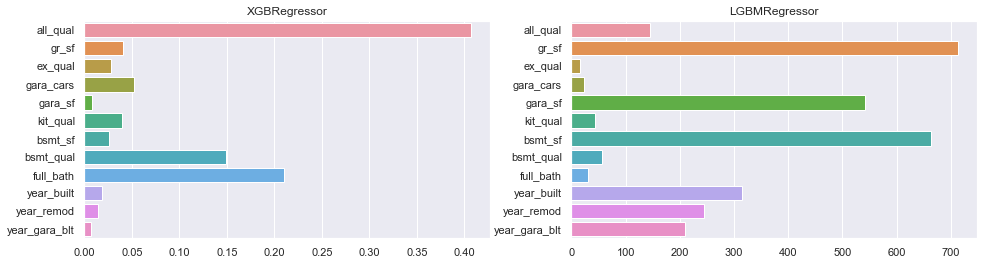

In [60]:
fit_score(df_t, 'drop_bsmt&1st_sf & log_sf')

In [61]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554


### plan 2) mean feature

In [62]:
df_t=df.copy()

In [63]:
df_t['mean_floor_sf']=(df['gr_sf']+df['bsmt_sf']+df['1st_sf'])/3

In [64]:
df_t=df_t.drop(['gr_sf', 'bsmt_sf', '1st_sf'], axis=1)

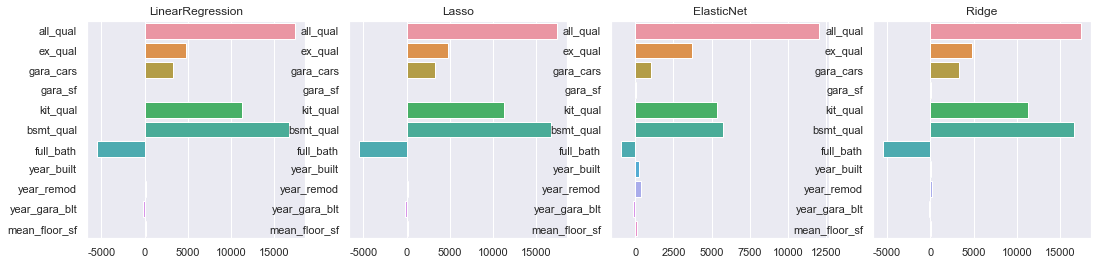

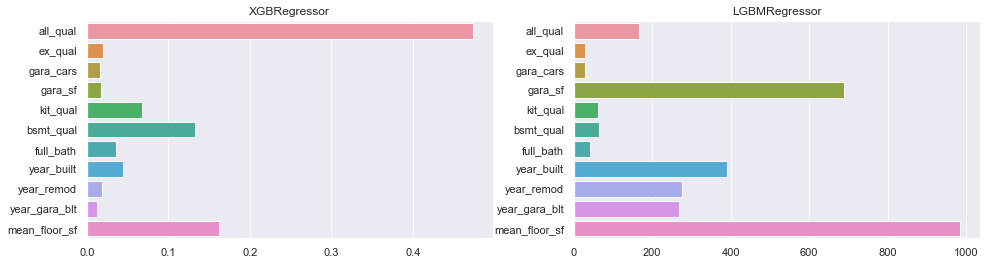

In [65]:
fit_score(df_t, 'mean_floor_sf')

In [66]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290


### plan 3) give different weight

In [67]:
df_t=df.copy()

In [68]:
# bsmt_sf, 1st_sf -> mean
df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [69]:
# differently log scaling
df_t['gr_sf']=np.log2(df_t['gr_sf'])
df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
df_t['gara_sf']=np.log10(df_t['gara_sf'])

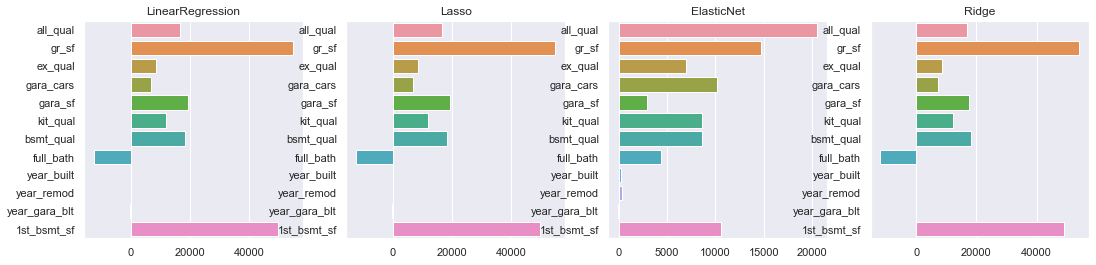

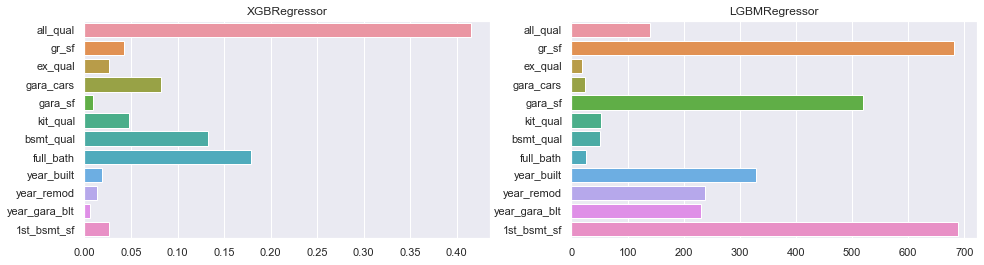

In [70]:
fit_score(df_t, 'diff_weight_sf')

In [71]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766


<AxesSubplot:>

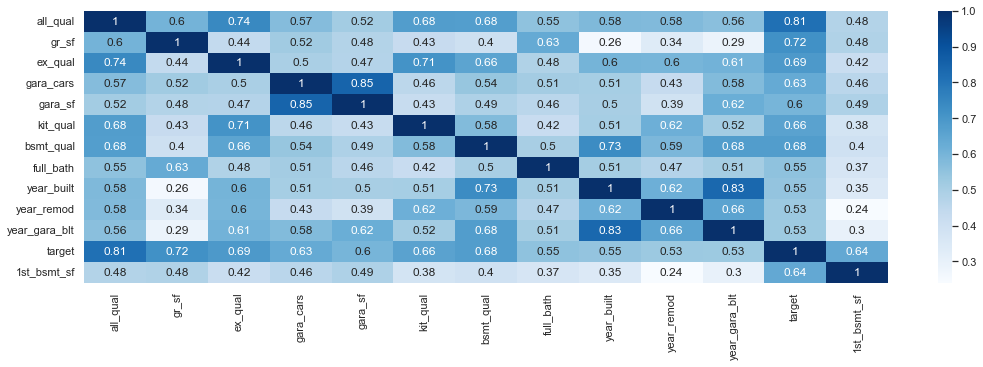

In [72]:
sns.heatmap(df_t.corr(), cmap='Blues', annot=True)

## year

* plan 1) drop all year values --> log sf
* plan 2) mean year values    --> log sf
* plan 3) drop year_gara_blt  --> log sf

In [73]:
df.columns

Index(['all_qual', 'gr_sf', 'ex_qual', 'gara_cars', 'gara_sf', 'kit_qual',
       'bsmt_sf', '1st_sf', 'bsmt_qual', 'full_bath', 'year_built',
       'year_remod', 'year_gara_blt', 'target'],
      dtype='object')

### compare distributions of year values

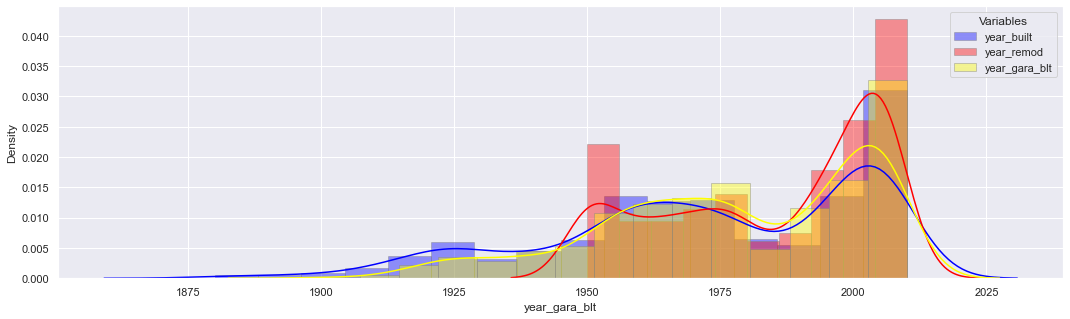

In [74]:
var_color_dict = {'year_built': 'blue', 
                      'year_remod': 'red', 
                      'year_gara_blt': 'yellow'}

for var in var_color_dict:
    sns.distplot(df[var],                  
                    color = var_color_dict[var], 
                    hist_kws = {'edgecolor': 'gray'}, 
                    label = var)

plt.legend(title = 'Variables')
plt.show()

### year vs qual

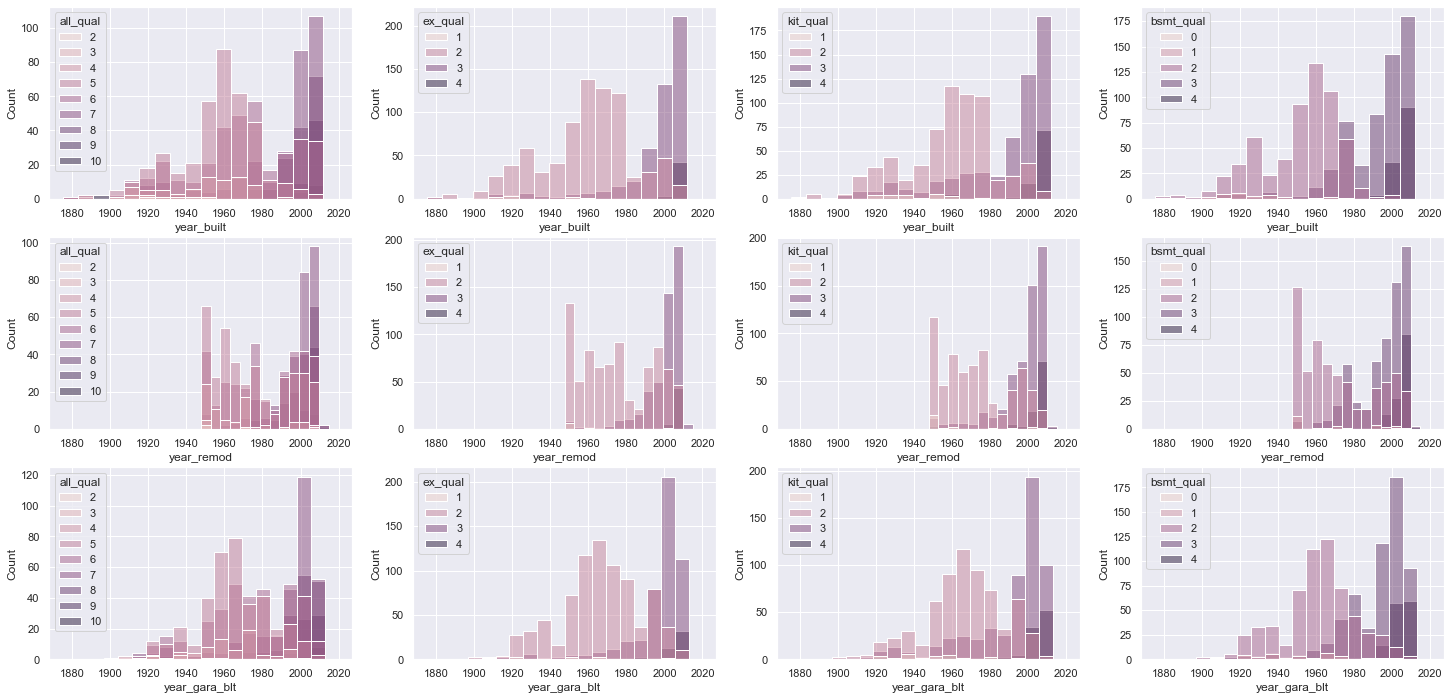

In [75]:
f, axs = plt.subplots(3,4, figsize=(25,12))

year_list=['year_built','year_remod','year_gara_blt']
qual_list=['all_qual','ex_qual','kit_qual', 'bsmt_qual']

for j, year in enumerate(year_list):
    for i, qual in enumerate(qual_list):
        sns.histplot(data=df, x=year, hue=qual, ax=axs[j,i], binrange=(1875,2020))


### plan 1) drop all year values

In [76]:
df_t=df.copy()

In [77]:
df_t=df_t.drop(['year_built','year_remod','year_gara_blt'], axis=1)

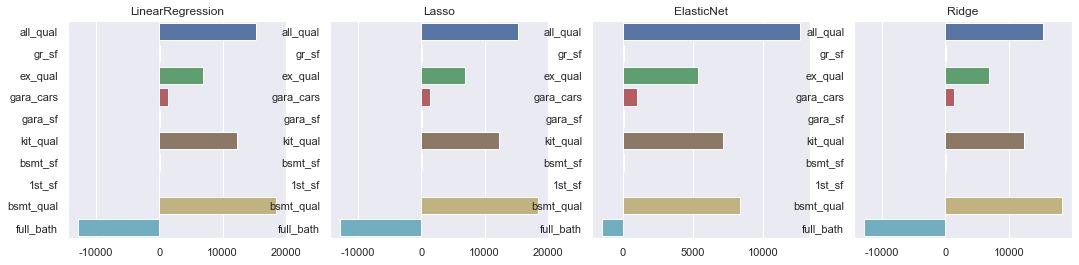

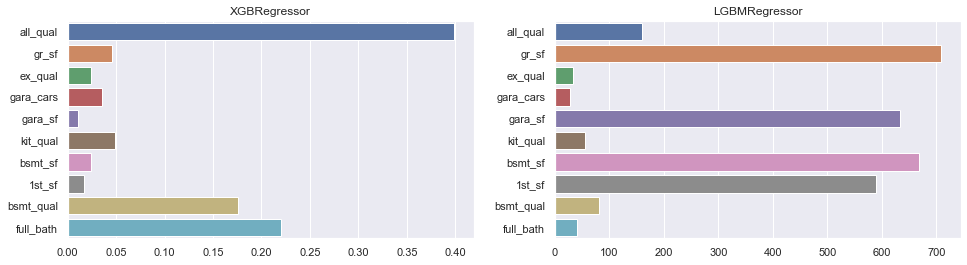

In [78]:
fit_score(df_t, 'drop_years')

In [79]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297


### plan 1-2) drop all year values -> diffrent weight sf

In [80]:
# bsmt_sf, 1st_sf -> mean
df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [81]:
# differently log scaling
df_t['gr_sf']=np.log2(df_t['gr_sf'])
df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
df_t['gara_sf']=np.log10(df_t['gara_sf'])

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114


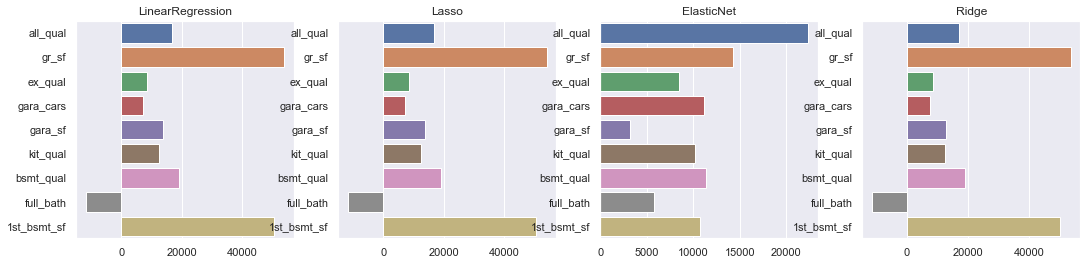

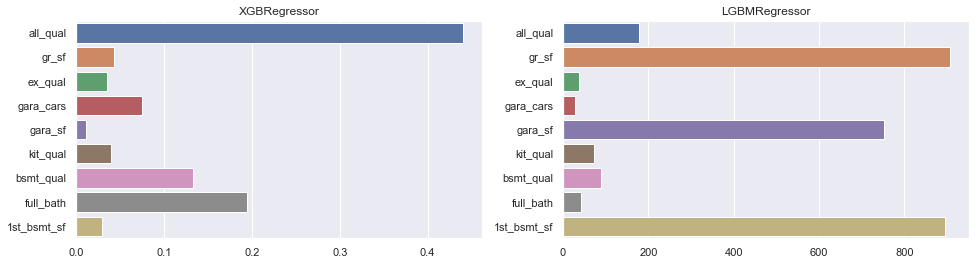

In [82]:
fit_score(df_t, 'drop_years&diff_weight_sf')
sco_df

### plan2) mean year values

In [83]:
df_t=df.copy()

In [84]:
df_t['mean_year']=(df_t['year_built']+df_t['year_remod']+df_t['year_gara_blt'])/3
df_t['mean_year']=np.round(df_t['mean_year'])

In [85]:
year_list=['year_built','year_remod','year_gara_blt']
df_t=df_t.drop(year_list, axis=1)
df_t.head()

,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,target,mean_year
0,10,2392,4,3,968,4,2392,2392,4,2,386250,2003.0
1,7,1352,3,2,466,3,1352,1352,4,2,194000,2006.0
2,5,900,2,1,288,2,864,900,2,1,123000,1967.0
3,5,1174,2,2,576,3,680,680,2,1,135000,1969.0
4,7,1958,3,3,936,3,1026,1026,3,2,250000,2005.0


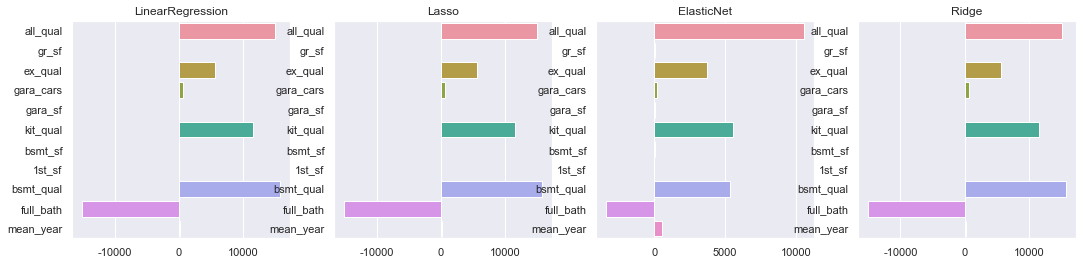

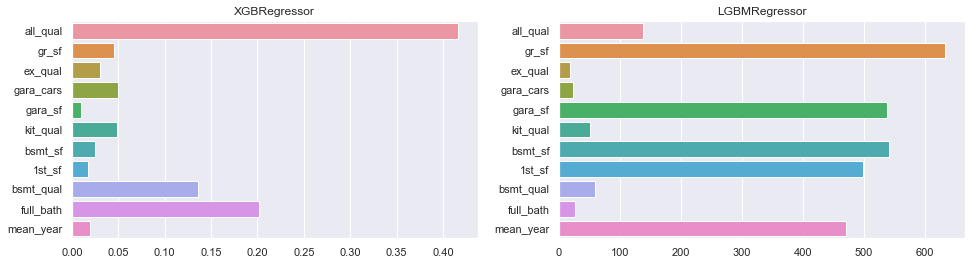

In [86]:
fit_score(df_t, 'mean_year')

In [87]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035


### plan 2-2) mean year values -> diffrent weight sf

In [88]:
# bsmt_sf, 1st_sf -> mean
df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [89]:
# differently log scaling
df_t['gr_sf']=np.log2(df_t['gr_sf'])
df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
df_t['gara_sf']=np.log10(df_t['gara_sf'])

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761


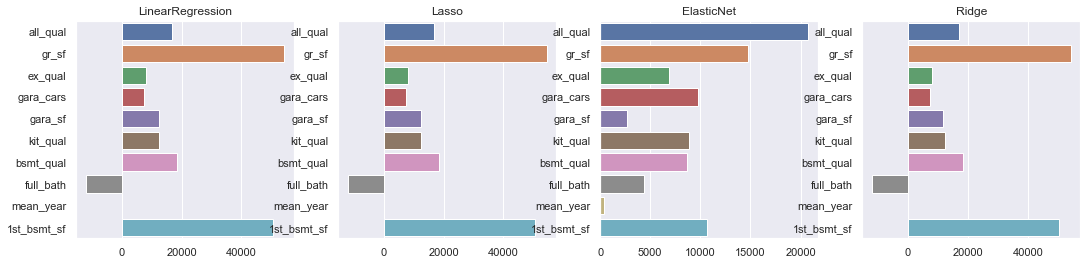

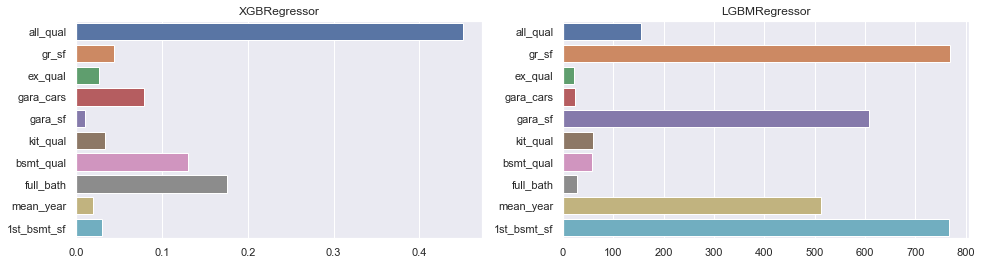

In [90]:
fit_score(df_t, 'mean_years&diff_weight_sf')
sco_df

### plan 3) drop year_gara_blt

In [91]:
df_t=df.copy()

In [92]:
df_t=df_t.drop(['year_gara_blt'], axis=1)

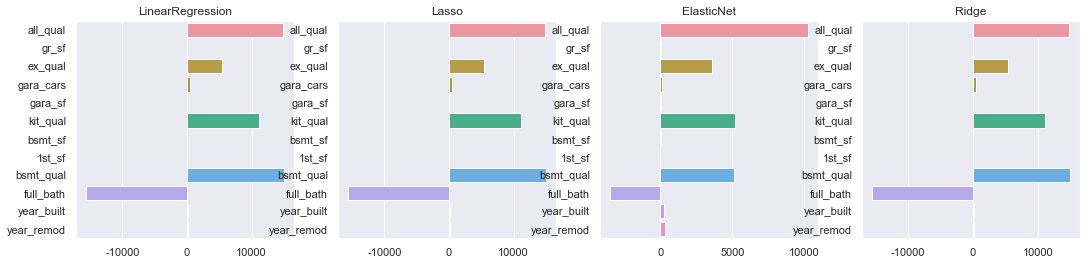

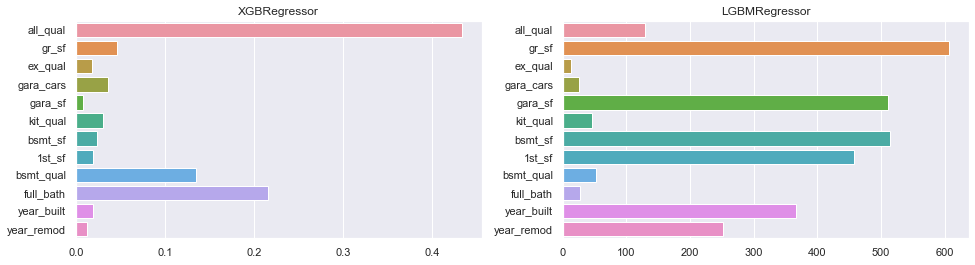

In [93]:
fit_score(df_t, 'drop_gara_years')

In [94]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772


### plan 3-2) drop gara year values -> diffrent weight sf

In [95]:
# bsmt_sf, 1st_sf -> mean
df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [96]:
# differently log scaling
df_t['gr_sf']=np.log2(df_t['gr_sf'])
df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
df_t['gara_sf']=np.log10(df_t['gara_sf'])

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298


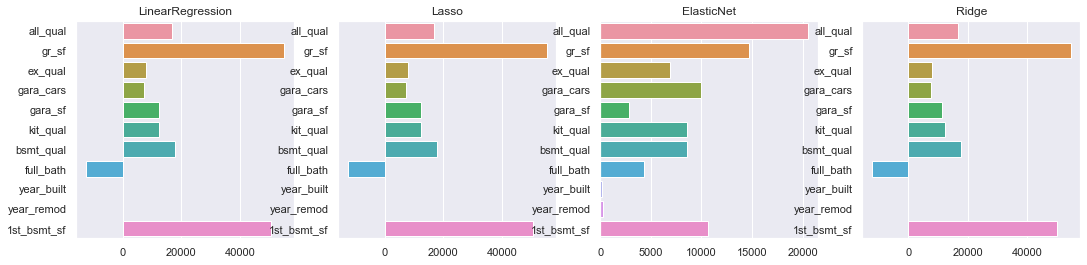

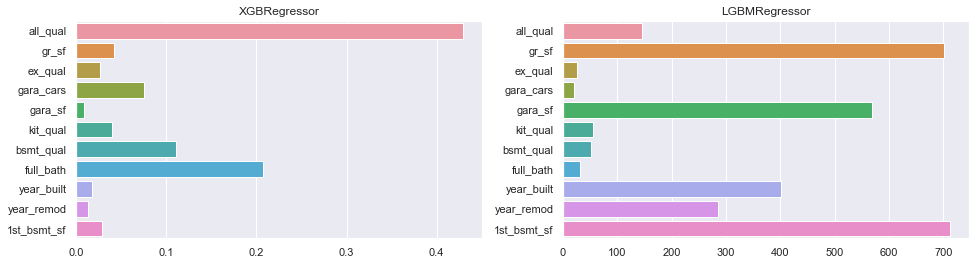

In [97]:
fit_score(df_t, 'drop_gara_years&diff_weight_sf')
sco_df

<AxesSubplot:>

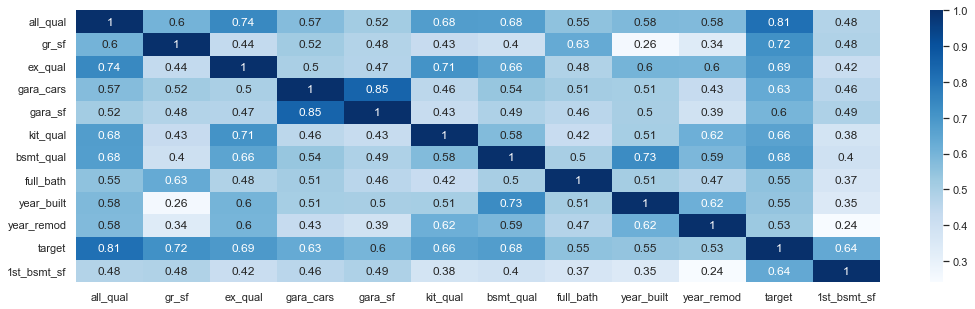

In [98]:
sns.heatmap(df_t.corr(), cmap='Blues', annot=True)

## qual

* plan 1) drop all qual columns without all_qual
* plan 2) mean all qual columns

In [99]:
qual_list=['all_qual','ex_qual','kit_qual', 'bsmt_qual']

for qual in qual_list[1:]:
    print(pd.crosstab(df['all_qual'], df[qual]))


ex_qual   1    2    3   4
all_qual                 
2         0    3    0   0
3         0    7    1   0
4         3   70    2   0
5         4  355   20   0
6         1  285   64   1
7         0   84  223   0
8         0    3  147   6
9         0    1   25  30
10        0    0    3  12
kit_qual   1    2    3   4
all_qual                  
2          0    3    0   0
3          2    6    0   0
4          6   59   10   0
5         10  302   61   6
6          5  226  115   5
7          0   61  236  10
8          0    3  128  25
9          0    0    7  49
10         0    0    3  12
bsmt_qual  0   1    2    3   4
all_qual                      
2          0   1    2    0   0
3          0   1    7    0   0
4          1   6   58   10   0
5          0  12  292   74   1
6          0   7  187  148   9
7          0   1   52  237  17
8          0   0    5  107  44
9          0   0    0    5  51
10         0   0    2    1  12


### plan 1) drop all qual columns without all_qual

In [100]:
df_t=df.copy()

In [101]:
df_t=df_t.drop(['ex_qual','kit_qual', 'bsmt_qual'], axis=1)

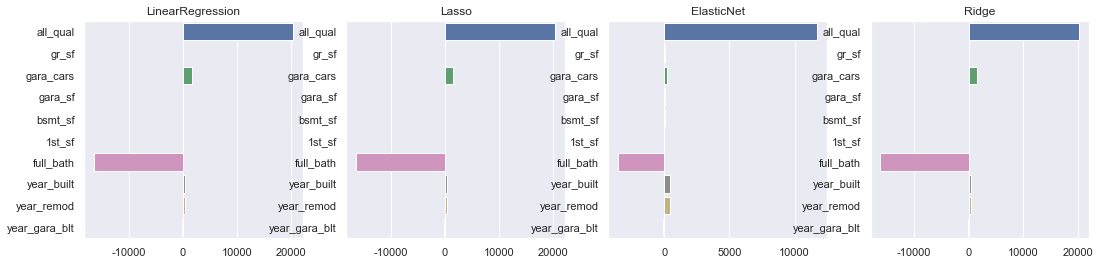

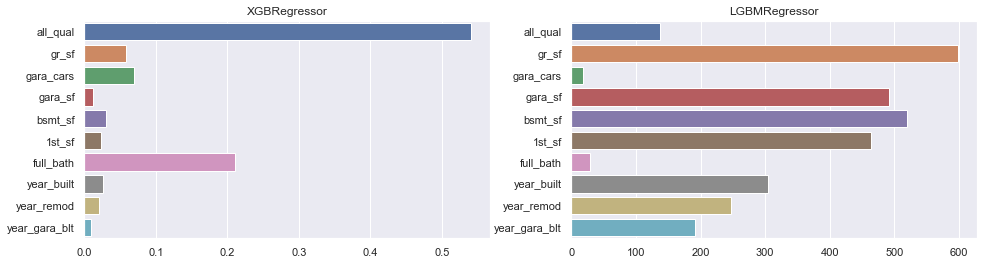

In [102]:
fit_score(df_t, 'drop_qual_col_wo_all')

In [103]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502


### plan 2) mean all qual columns

In [104]:
df_t=df.copy()

In [105]:
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual'])/4

In [106]:
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

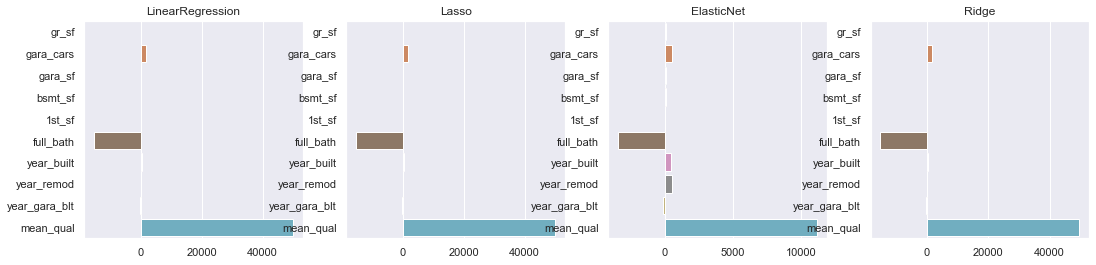

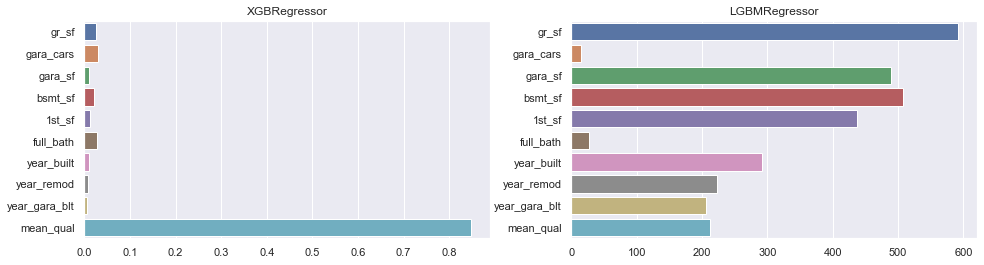

In [107]:
fit_score(df_t, 'mean_qual')

In [108]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all,mean_qual
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024,0.114426
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023,0.114424
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555,0.124035
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998,0.114343
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313,0.104700
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502,0.097919


### plan 2-2) mean all qual columns -> drop gara year

In [109]:
df_t=df_t.drop('year_gara_blt', axis=1)

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all,mean_qual,mean_qual&drop_gara_year
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024,0.114426,0.114590
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023,0.114424,0.114589
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555,0.124035,0.124154
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998,0.114343,0.114506
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313,0.104700,0.103958
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502,0.097919,0.097629


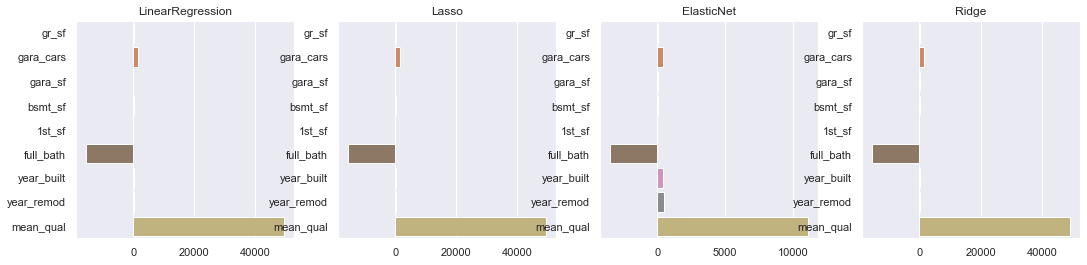

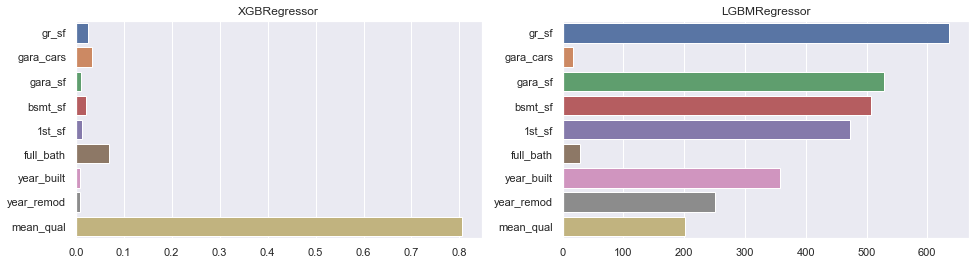

In [110]:
fit_score(df_t, 'mean_qual&drop_gara_year')
sco_df

### plan 2-3) mean all qual columns -> drop gara year -> mean_sf

In [111]:
df_t['mean_floor_sf']=(df['gr_sf']+df['bsmt_sf']+df['1st_sf'])/3

In [112]:
df_t=df_t.drop(['gr_sf', 'bsmt_sf', '1st_sf'], axis=1)

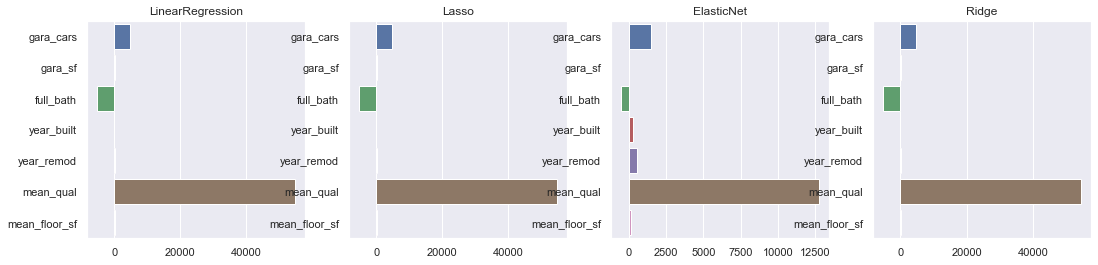

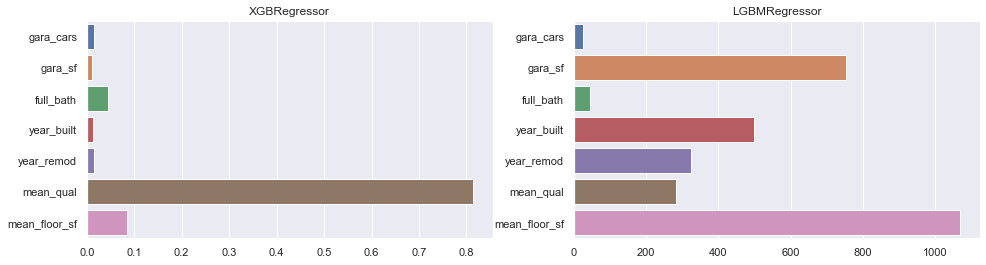

In [113]:
fit_score(df_t, 'mean_qual&drop_gara_year&&mean_floor_sf')

In [114]:
sco_df

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all,mean_qual,mean_qual&drop_gara_year,mean_qual&drop_gara_year&&mean_floor_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024,0.114426,0.114590,0.120210
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023,0.114424,0.114589,0.120208
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555,0.124035,0.124154,0.132435
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998,0.114343,0.114506,0.120117
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313,0.104700,0.103958,0.110930
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502,0.097919,0.097629,0.106417


## gara_sf & gara_cars

<AxesSubplot:xlabel='gara_sf', ylabel='Count'>

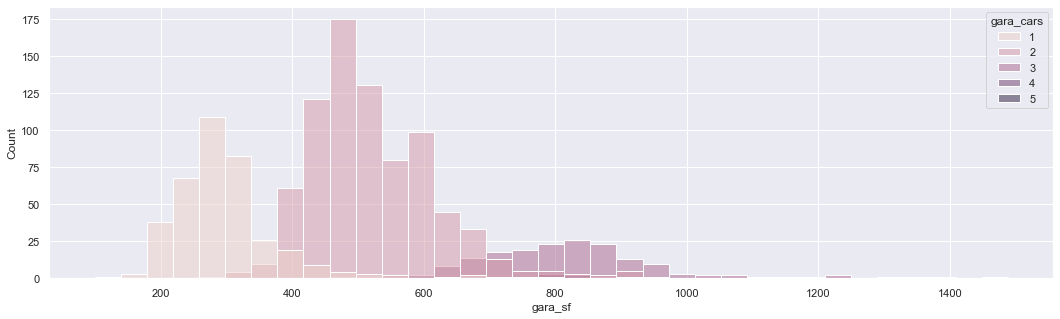

In [115]:
sns.histplot(data=df, x='gara_sf', hue='gara_cars')

In [116]:
df_t=df.copy()

In [117]:
df_t=df.drop('gara_sf',axis=1)

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all,mean_qual,mean_qual&drop_gara_year,mean_qual&drop_gara_year&&mean_floor_sf,drop_gara_sf
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024,0.114426,0.114590,0.120210,0.115593
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023,0.114424,0.114589,0.120208,0.115591
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555,0.124035,0.124154,0.132435,0.117301
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998,0.114343,0.114506,0.120117,0.115564
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313,0.104700,0.103958,0.110930,0.106032
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502,0.097919,0.097629,0.106417,0.101160


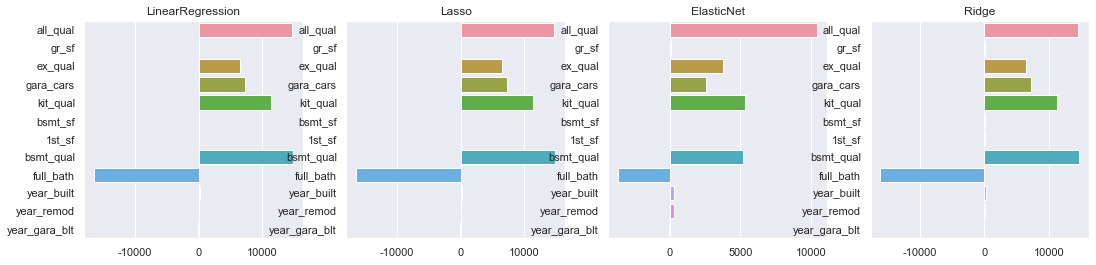

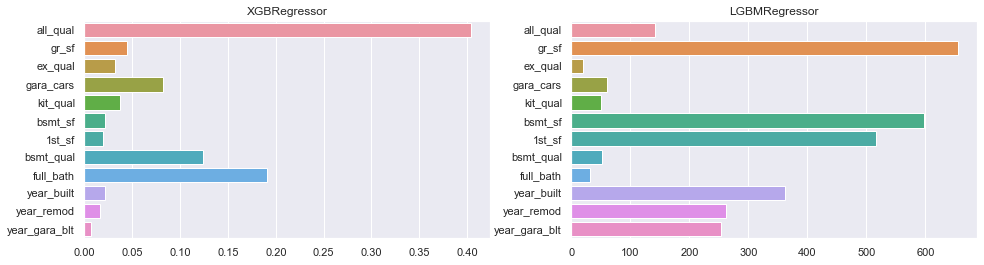

In [118]:
fit_score(df_t, 'drop_gara_sf')
sco_df

### -> drop[gara_year], mean_qual

In [119]:
df_t=df_t.drop(['year_gara_blt'], axis=1)

In [120]:
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual'])/4

In [121]:
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all,mean_qual,mean_qual&drop_gara_year,mean_qual&drop_gara_year&&mean_floor_sf,drop_gara_sf,drop_gara_sf&drop_gara_year&mean_qual
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024,0.114426,0.114590,0.120210,0.115593,0.115227
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023,0.114424,0.114589,0.120208,0.115591,0.115226
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555,0.124035,0.124154,0.132435,0.117301,0.125949
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998,0.114343,0.114506,0.120117,0.115564,0.115155
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313,0.104700,0.103958,0.110930,0.106032,0.106394
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502,0.097919,0.097629,0.106417,0.101160,0.097787


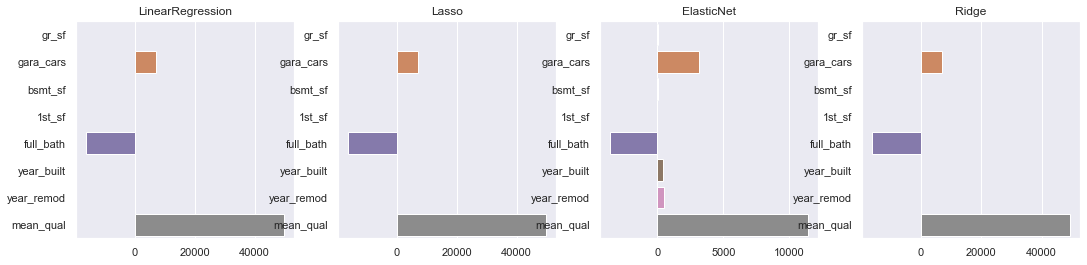

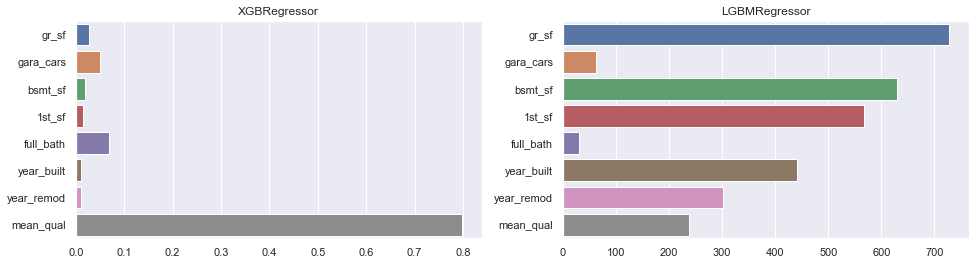

In [122]:
fit_score(df_t, 'drop_gara_sf&drop_gara_year&mean_qual')
sco_df

# Second trial

In [123]:
df_t=df.copy()

In [124]:
df_t=df_t.drop(['year_gara_blt'], axis=1)

In [125]:
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual'])/4

In [126]:
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

LinearRegression()    0.114590
Lasso()               0.114589
ElasticNet()          0.124154
Ridge()               0.114506
XGBRegressor()        0.103958
LGBMRegressor()       0.097629
Name: drop_gara_year&mean_qual, dtype: float64


,pre_processing,drop_bsmt&1st_sf,drop_bsmt&1st_sf & log_sf,drop_1st_sf,drop_bsmt&1st_sf & log_sf,mean_floor_sf,diff_weight_sf,drop_years,drop_years&diff_weight_sf,mean_year,mean_years&diff_weight_sf,drop_gara_years,drop_gara_years&diff_weight_sf,drop_qual_col_wo_all,mean_qual,mean_qual&drop_gara_year,mean_qual&drop_gara_year&&mean_floor_sf,drop_gara_sf,drop_gara_sf&drop_gara_year&mean_qual
LinearRegression(),0.114679,0.128371,0.136562,0.114905,0.126236,0.120757,0.124893,0.115773,0.125208,0.115119,0.125133,0.114818,0.125045,0.119024,0.114426,0.114590,0.120210,0.115593,0.115227
Lasso(),0.114677,0.128369,0.136559,0.114903,0.126234,0.120755,0.124893,0.115772,0.125209,0.115117,0.125133,0.114816,0.125046,0.119023,0.114424,0.114589,0.120208,0.115591,0.115226
ElasticNet(),0.115463,0.130594,0.149715,0.115539,0.144658,0.120091,0.141466,0.116909,0.139812,0.116165,0.141540,0.115693,0.141514,0.119555,0.124035,0.124154,0.132435,0.117301,0.125949
Ridge(),0.114654,0.128334,0.136416,0.114879,0.126162,0.120717,0.124862,0.115744,0.125171,0.115090,0.125096,0.114788,0.125007,0.118998,0.114343,0.114506,0.120117,0.115564,0.115155
XGBRegressor(),0.105701,0.114146,0.114143,0.105439,0.105475,0.110582,0.104164,0.112622,0.111443,0.105588,0.108405,0.104423,0.105843,0.107313,0.104700,0.103958,0.110930,0.106032,0.106394
LGBMRegressor(),0.099447,0.112721,0.112707,0.101458,0.101554,0.103290,0.099766,0.106297,0.105114,0.101035,0.100761,0.099772,0.100298,0.100502,0.097919,0.097629,0.106417,0.101160,0.097787


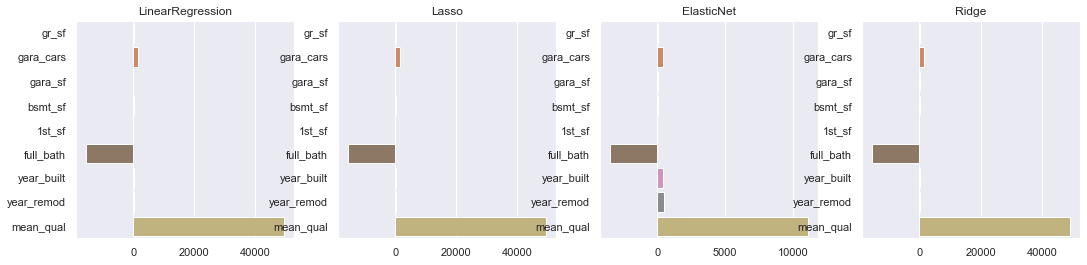

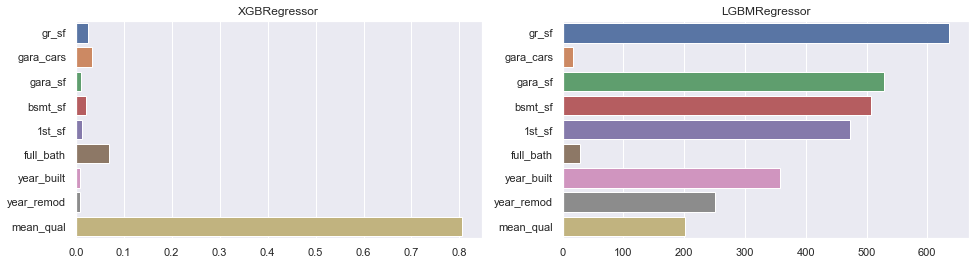

In [127]:
fit_score(df_t, 'drop_gara_year&mean_qual', DF=False)
sco_df

In [128]:
df_t['target']=np.log1p(df_t['target'])

# Grid Search CV

In [ ]:
NMAE_score = make_scorer(NMAE, greater_is_better = False)


y = df_t['target']
X = df_t.drop(['target'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=1024,
                                                   shuffle=True
                                                      )

model = LGBMRegressor(random_state=1024)
#-- 튜닝 : 하이퍼파라미터 값을 임의로 변경해서 모델의 성능을 좋게 한다.
myparam = {'learning_rate': [0.05, 0.1, 0.2],
           'reg_lambda': [0.7, 0.8, 0.9, 1],
           'n_estimators' : [40, 45, 50, 55]
        }

kfold = KFold(n_splits=5, shuffle=True, random_state=1024) 
gcv_model = GridSearchCV(model, param_grid=myparam, scoring=NMAE_score, refit=True, cv=kfold)


gcv_model.fit(X_train, y_train)
print(gcv_model.best_score_)
print(gcv_model.best_params_)
# print(gcv_model.cv_results_)



-0.008123145763234972
{'learning_rate': 0.1, 'n_estimators': 40, 'reg_lambda': 0.9}


In [130]:
pred=gcv_model.predict(X_test)
NMAE(y_test, pred)


0.008602439258939255

# Submission

In [131]:
test=pd.read_csv("./dataset/test.csv")

In [132]:
test.columns=[col.lower() for col in test.columns]

In [133]:
col_list=['id','all_qual','gr_sf','ex_qual', 'gara_cars','gara_sf','kit_qual','bsmt_sf','1st_sf','bsmt_qual','full_bath','year_built','year_remod','year_gara_blt']
test.columns=col_list

In [134]:
# unique columns drop
test=test.drop('id', axis=1)

In [135]:
col_list=test.select_dtypes(include='object').columns.tolist()
for col in col_list:
    test[col]=test[col].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[4,3,2,1,0])

In [136]:
test=test.drop(['year_gara_blt'], axis=1)

In [137]:
test['mean_qual']=(test['all_qual']+test['ex_qual']+test['kit_qual']+test['bsmt_qual'])/4

In [138]:
test=test.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

In [140]:
pred=gcv_model.predict(test)

In [141]:
sub=pd.read_csv("./dataset/sample_submission.csv")

In [142]:
sub['target']=np.expm1(pred)

In [143]:
sub.head()

,id,target
0,1,301338.910480
1,2,127695.046418
2,3,174865.671022
3,4,266489.190705
4,5,129685.252071


In [144]:
sub.to_csv('./dataset/housing_submission_log.csv', index=False)